**DID SOME MANIPUALTION IN EXCEL IN OTHER TO ENSURE EASY MERGING AND CONSISTENCY ACROSS EACH DATA SET WHICH WOULD SPECIFIED BELOW FOR CLEARITY SAKE**



**Delete the following column** :Electricity Use - Grid Purchase (GJ),Natural Gas Use (therms),'Diesel Use (GJ)', 'Kerosene Use (GJ)',Weather Normalized Source Energy Use (GJ)',  'Weather Normalized Site EUI (GJ/m²)','Weather Normalized Site EUI (ekWh/sqft)','Weather Normalized Source EUI (GJ/m²)', 'Weather Normalized Source EUI (ekWh/sqft)','Site Energy Use (GJ)', 'Source Energy Use (GJ)','Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)','Wood Use (GJ)', 'Propane Use (GJ)', 'Fuel Oil 1 & 2', 'Fuel Oil 1 & 2 Unit', 'Fuel Oil 4 &6','Fuel Oil 4 &6 Unit','Energy Intensity ekWh_mega_litre'

**Created new column** :Electricity_Unit(Cubic meter),Natural Gas Unit(Kwh),Wood_unit,Property name and Propery type, operation and operation type, 'Site EUI (GJ/m²)', 'Site EUI (ekWh/sqft)', 'Source EUI (GJ/m²)', 'Source EUI (ekWh/sqft)',

**Unit Conversion** : Natural Gas(Gj) to **cubic meter**, Propane(GJ) to **Litre**,'Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)' to **KG**

In [131]:
import pandas as pd
import re
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
import math
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from xgboost import XGBRegressor
from scipy.stats import boxcox
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)





**Load data set in to data frame**

In [132]:
# Example imports for each dataset
df_2012 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/2012_bps(Energy use and greenhouse gas emissions for the Broader Public Sector)).xlsx")
df_2013 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/bps_2013_Final data (Energy use and greenhouse gas emissions for the Broader Public Sector)).xlsx")
df_2014 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/bps_2014_Final data set(Energy use and greenhouse gas emissions for the Broader Public Sector)).xlsx")
df_2015 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/bps_2015(Energy use and greenhouse gas emissions for the Broader Public Sector)).xlsx")
df_2016 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/2016_Final data (Energy use and greenhouse gas emissions for the Broader Public Sector).xlsx")
df_2017 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/2017_energy_consumption(Energy use and greenhouse gas emissions for the Broader Public Sector).xlsx")
df_2018 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/2018_final_data_set(Energy use and greenhouse gas emissions for the Broader Public Sector).xlsx")
df_2019 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/2019_final_data_set (Energy use and greenhouse gas emissions for the Broader Public Sector).xlsx")
df_2020 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/2020 final data set (Energy use and greenhouse gas emissions for the Broader Public Sector).xlsx")
df_2021 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/2021_final_bps_dataset(Energy use and greenhouse gas emissions for the Broader Public Sector).xlsx")
df_2022 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/2022_final_data_set(Energy use and greenhouse gas emissions for the Broader Public Sector).xlsx")
df_2023 = pd.read_excel("C:/Users/user/Desktop/Capstone Projection/Final data set/2023_final_data_set(Energy use and greenhouse gas emissions for the Broader Public Sector).xlsx")


**Print first 5 row**

In [133]:

df_2012.head()

,Year,Sector Name,Sub Sector,Organization Name,Operation Name,Operation Type,Address,City,Postal Code,Total Floor Area,...,District Cooling Unit,District Cooling Renewable,District Cooling Renewable Emission Factor,Number of Portables,Swimming Pools,GHG Emissions KG,Energy Intensity ekWh_sqft,Energy Intensity ekWh_mega_litre,Energy Intensity GJ_m2,Energy Intensity GJ_mega_litre
0,2012,Public Hospital,Acute/Chronic,Alexandra Hospital,Alexandra Hospital,Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,4660.700000,...,Giga Joule,False,0.0,0.0,False,527560.002122,69.597090,0.0,2.696894,0.0
1,2012,Public Hospital,Acute/Chronic,Alexandra Hospital,Alexandra Hospital,Administrative offices and related facilities,29 Noxon Street,Ingersoll,N5C3V6,3813.300000,...,Giga Joule,False,0.0,0.0,False,431640.001737,69.597090,0.0,2.696894,0.0
2,2012,Public Hospital,Acute/Chronic,Alexandria Glengarry Memorial Hospital,Glengarry Memorial Hospital,Facilities used for hospital purposes,20260 County Road 43,Alexandria,K0C1A0,51016.000000,...,Giga Joule,False,0.0,0.0,False,586529.974768,79.689235,0.0,3.087966,0.0
3,2012,Public Hospital,Acute/Chronic,Alexandria Glengarry Memorial Hospital,Glengarry Memorial Hospital,Administrative offices and related facilities,20260 County Road 43,Alexandria,K0C1A0,3953.000000,...,Giga Joule,False,0.0,0.0,False,45449.455922,79.691924,0.0,3.088070,0.0
4,2012,School Board,School Board,Algoma District School Board,Adult Ed - Blind River (WC Eaket),Schools,147 Woodward Ave,Blind River,P0R1B0,1128.811234,...,Giga Joule,False,0.0,0.0,False,52593.003152,266.361078,0.0,10.321518,0.0


**Put all data in a dictionary for easy looping and manipulation**

In [134]:
#Put all DataFrames in a dictionary for easy looping 
dfs = {
    "df_2012": df_2012,
    "df_2013": df_2013,
    "df_2014": df_2014,
    "df_2015": df_2015,
    "df_2016": df_2016,
    "df_2017": df_2017,
    "df_2018": df_2018,
    "df_2019": df_2019,
    "df_2020": df_2020,
    "df_2021": df_2021,
    "df_2022": df_2022,
    "df_2023": df_2023
}

**Print the column name for each data frame**

In [135]:
#Print the columns for each DataFrame 
for name, df in dfs.items():
    print(f"\nColumns in {name}:")
    print(df.columns)


Columns in df_2012:
Index(['Year', 'Sector Name', 'Sub Sector ', 'Organization Name',
       'Operation Name', 'Operation Type', 'Address', 'City', 'Postal Code',
       'Total Floor Area ', 'Unit', 'Average Hours per week', 'Annual Flow ',
       'Electricity', 'Electricity Unit', 'Natural Gas', 'Natural Gas2',
       'Fuel Oil 1 & 2', 'Fuel Oil 1 & 2 Unit', 'Fuel Oil 4 &6',
       'Fuel Oil 4 &6 Unit', 'Propane', 'Propane Unit', 'Coal Quantity',
       'Coal Unit', 'Wood', 'Wood3', 'District Heating',
       'District Heating Unit', 'Renewable', 'Renewable Emission Factor',
       'District Cooling', 'District Cooling Unit',
       'District Cooling Renewable',
       'District Cooling Renewable Emission Factor', 'Number of Portables',
       'Swimming Pools', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft',
       'Energy Intensity ekWh_mega_litre', 'Energy Intensity GJ_m2',
       'Energy Intensity GJ_mega_litre'],
      dtype='object')

Columns in df_2013:
Index(['Year', 'Sector

**Dropping the column that was not needed and printing the column count for each data frame except df_2012**

In [136]:
columns_to_drop = [
    'DistrictHeating_RenewableEmissionFactor', 
    'DistrictCooling_RenewableEmissionFactor',
    'Fuel Oil 1 & 2', 'Fuel Oil 1 & 2 Unit', 
    'Fuel Oil 4 &6', 'Fuel Oil 4 &6 Unit'
]
for name, df in dfs.items():
    df.drop(columns=[col for col in columns_to_drop if col in df.columns],
            inplace=True)

# Now both dfs["df_2012"] and df_2012 are the same object, columns are dropped
for name, df in dfs.items():
    print(f"{name} has {len(df.columns)} columns.")

df_2012 has 38 columns.
df_2013 has 40 columns.
df_2014 has 40 columns.
df_2015 has 40 columns.
df_2016 has 40 columns.
df_2017 has 40 columns.
df_2018 has 40 columns.
df_2019 has 40 columns.
df_2020 has 40 columns.
df_2021 has 63 columns.
df_2022 has 62 columns.
df_2023 has 62 columns.


**Dropping the same column that was dropped obove for df_2012 but with a different code becasue the column name is different**

In [137]:
# Define the columns you want to drop
columns_to_drop = ['District Cooling Renewable Emission Factor', 'Renewable Emission Factor']

# Drop the columns from df_2012 only if they exist
df_2012 = df_2012.drop(columns=[col for col in columns_to_drop if col in df_2012.columns])

# Optional: print the remaining column names to verify
print("Remaining columns in df_2012:")
print(df_2012.columns.tolist())


Remaining columns in df_2012:
['Year', 'Sector Name', 'Sub Sector ', 'Organization Name', 'Operation Name', 'Operation Type', 'Address', 'City', 'Postal Code', 'Total Floor Area ', 'Unit', 'Average Hours per week', 'Annual Flow ', 'Electricity', 'Electricity Unit', 'Natural Gas', 'Natural Gas2', 'Propane', 'Propane Unit', 'Coal Quantity', 'Coal Unit', 'Wood', 'Wood3', 'District Heating', 'District Heating Unit', 'Renewable', 'District Cooling', 'District Cooling Unit', 'District Cooling Renewable', 'Number of Portables', 'Swimming Pools', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity ekWh_mega_litre', 'Energy Intensity GJ_m2', 'Energy Intensity GJ_mega_litre']


**Recounting numbers of column from each dataframe**

In [138]:
# Assuming you have your DataFrames stored in a dictionary
dfs = {
    'df_2012': df_2012,
    'df_2013': df_2013,
    'df_2014': df_2014,
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019,
    'df_2020': df_2020,
    'df_2021': df_2021,
    'df_2022': df_2022,
    'df_2023': df_2023,
}

# Loop over each DataFrame and print the number of columns
for name, df in dfs.items():
    print(f"{name} has {len(df.columns)} columns.")

df_2012 has 36 columns.
df_2013 has 40 columns.
df_2014 has 40 columns.
df_2015 has 40 columns.
df_2016 has 40 columns.
df_2017 has 40 columns.
df_2018 has 40 columns.
df_2019 has 40 columns.
df_2020 has 40 columns.
df_2021 has 63 columns.
df_2022 has 62 columns.
df_2023 has 62 columns.


**Using loop to reprint the column name fore each dataframe to check for discrepancies**

In [139]:
# Loop over each DataFrame in the dictionary and print its column names
for name, df in dfs.items():
    print(f"Columns in {name}:")
    print(df.columns.tolist())
    print("-" * 50)


Columns in df_2012:
['Year', 'Sector Name', 'Sub Sector ', 'Organization Name', 'Operation Name', 'Operation Type', 'Address', 'City', 'Postal Code', 'Total Floor Area ', 'Unit', 'Average Hours per week', 'Annual Flow ', 'Electricity', 'Electricity Unit', 'Natural Gas', 'Natural Gas2', 'Propane', 'Propane Unit', 'Coal Quantity', 'Coal Unit', 'Wood', 'Wood3', 'District Heating', 'District Heating Unit', 'Renewable', 'District Cooling', 'District Cooling Unit', 'District Cooling Renewable', 'Number of Portables', 'Swimming Pools', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity ekWh_mega_litre', 'Energy Intensity GJ_m2', 'Energy Intensity GJ_mega_litre']
--------------------------------------------------
Columns in df_2013:
['Year', 'Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Total Indoor Space_x', 'Unit of Measure', 'Weekly Average Hours', 'Annual Flow (M', 'Number of Portables', 'Swimming Pool', 'Electric

**Rename the column in df_12 to ensure consistency**

In [140]:
# Define a mapping dictionary to rename the columns in df_12
rename_map = {
    'Year': 'year',
    'Sector Name':  'Sector',
    'Organization Name': 'Organization',
    'Operation Name': 'Operation',
    'Total Floor Area ': 'Total Indoor Space_x', # remove trailing space
    'Unit':'Unit of Measure',
    'Average Hours per week':'Weekly Average Hours',
    'Annual Flow ': 'Annual Flow (M',           # remove trailing space
    'Electricity':'Electricity_Quantity',
    'Electricity Unit': 'Electricity_Unit',
    'Natural Gas': 'NaturalGas_Quantity',
    'Natural Gas2': 'NaturalGas_Unit',
    'Fuel Oil 1 & 2': 'FuelOil12_Quantity',
    'Fuel Oil 1 & 2 Unit': 'FuelOil12_Unit',
    'Fuel Oil 4 &6': 'FuelOil46_Quantity',
    'Fuel Oil 4 &6 Unit': 'FuelOil46_Unit',
    'Propane': 'Propane_Quantity',
    'Propane Unit':  'Propane_Unit',
    'Coal Quantity': 'Coal_Quantity',
    'Coal Unit': 'Coal_Unit',
    'Wood': 'Wood_Quantity',
    'Wood3': 'Wood_Unit',
    'District Heating': 'DistrictHeating_Quantity',
    'District Heating Unit': 'DistrictHeating_Unit',
    'Renewable':  'DistrictHeating_IsRenewable',
    'District Cooling': 'DistrictCooling_Quantity',
    'District Cooling Unit': 'DistrictCooling_Unit',
    'District Cooling Renewable':  'DistrictCooling_IsRenewable',
    'Swimming Pools':  'Swimming Pool'
}

# Rename the columns in df_12
df_2012.rename(columns=rename_map, inplace=True)

# Optional: Print the updated columns to verify the changes
print("Updated columns in df_12:")
print(df_2012.columns.tolist())


Updated columns in df_12:
['year', 'Sector', 'Sub Sector ', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Total Indoor Space_x', 'Unit of Measure', 'Weekly Average Hours', 'Annual Flow (M', 'Electricity_Quantity', 'Electricity_Unit', 'NaturalGas_Quantity', 'NaturalGas_Unit', 'Propane_Quantity', 'Propane_Unit', 'Coal_Quantity', 'Coal_Unit', 'Wood_Quantity', 'Wood_Unit', 'DistrictHeating_Quantity', 'DistrictHeating_Unit', 'DistrictHeating_IsRenewable', 'DistrictCooling_Quantity', 'DistrictCooling_Unit', 'DistrictCooling_IsRenewable', 'Number of Portables', 'Swimming Pool', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity ekWh_mega_litre', 'Energy Intensity GJ_m2', 'Energy Intensity GJ_mega_litre']


**Reprint Column Name**

In [141]:
# Loop over each DataFrame in the dictionary and print its column names
for name, df in dfs.items():
    print(f"Columns in {name}:")
    print(df.columns.tolist())
    print("-" * 50)


Columns in df_2012:
['year', 'Sector', 'Sub Sector ', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Total Indoor Space_x', 'Unit of Measure', 'Weekly Average Hours', 'Annual Flow (M', 'Electricity_Quantity', 'Electricity_Unit', 'NaturalGas_Quantity', 'NaturalGas_Unit', 'Propane_Quantity', 'Propane_Unit', 'Coal_Quantity', 'Coal_Unit', 'Wood_Quantity', 'Wood_Unit', 'DistrictHeating_Quantity', 'DistrictHeating_Unit', 'DistrictHeating_IsRenewable', 'DistrictCooling_Quantity', 'DistrictCooling_Unit', 'DistrictCooling_IsRenewable', 'Number of Portables', 'Swimming Pool', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity ekWh_mega_litre', 'Energy Intensity GJ_m2', 'Energy Intensity GJ_mega_litre']
--------------------------------------------------
Columns in df_2013:
['Year', 'Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Total Indoor Space_x', 'Unit of Measure', 'Weekly Average Ho

**Start with the cleaning of df_2021 to df_2023 by dropping the column not needed**

In [142]:
# Define the columns to drop
column_drop = [
    'Portfolio Manager Property ID','Propane Use (GJ)', 
    'Portfolio Manager Parent Property ID', 'Parent Property Name', 
    'Year Ending','Property GFA - Self-Reported (m²)', 
    'Number of Buildings', 'Custom Property ID 1 - Name', 'Custom Property ID 1 - Value', 
    'Custom Property ID 2 - Name', 'Custom Property ID 2 - Value', 
    'Custom Property ID 3 - Name', 'Custom Property ID 3 - Value',   
    'Report Submission Date','Fuel Oil #1 Use (GJ)', 'Fuel Oil #2 Use (GJ)', 
    'Fuel Oil #4 Use (GJ)', 'Fuel Oil #5 & 6 Use (GJ)','Electricity Use - Grid Purchase (GJ)', 
    'Natural Gas Use (therms)', 'Diesel Use (GJ)', 'Kerosene Use (GJ)',
    'District Steam Use (GJ)', 'District Hot Water Use (GJ)', 'District Chilled Water Use (GJ)',
    'Weather Normalized Site Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)', 'Weather Normalized Site EUI (GJ/m²)', 
    'Weather Normalized Site EUI (ekWh/sqft)', 'Weather Normalized Source EUI (GJ/m²)', 'Weather Normalized Source EUI (ekWh/sqft)',
     'Site Energy Use (GJ)', 'Source Energy Use (GJ)',
    'Total (Location-Based) GHG Emissions Intensity (kgCO2e/m²)',
     'Wood Use (GJ)','Address 2', 'List of All Property Use Types (GFA) (m²)', 'Largest Property Use Type',
    'Data Quality Checker Run?', 'Data Quality Checker - Date Run','Diesel #2 Use (GJ)', 'Natural Gas Use (GJ)'
     'Site EUI (ekWh/sqft)', 'Source EUI (GJ/m²)', 'Site EUI (GJ/m²)', 'Source EUI (ekWh/sqft)',
    'Total (Location-Based) GHG Emissions (Metric Tons CO2e)','Drinking Water Treatment & Distribution - Average Flow (m³PD)', 
    'Wastewater Treatment Plant - Average Influent Flow (m³PD)', 'Calculated with new source factors (Yes/No)',
    'Natural Gas Use (GJ)','Site EUI (ekWh/sqft)'
    
]

# Drop the columns from df_2021, df_2022, and df_2023 if they exist
df_2021 = df_2021.drop(columns=[col for col in column_drop if col in df_2021.columns])
df_2022 = df_2022.drop(columns=[col for col in column_drop if col in df_2022.columns])
df_2023 = df_2023.drop(columns=[col for col in column_drop if col in df_2023.columns])

# Print the remaining columns for each DataFrame to verify
print("Remaining columns in df_2021:")
print(df_2021.columns.tolist())
print("\nRemaining columns in df_2022:")
print(df_2022.columns.tolist())
print("\nRemaining columns in df_2023:")
print(df_2023.columns.tolist())


Remaining columns in df_2021:
['Year', 'Sector', 'Subsector', 'Organization', 'Property Name', 'Primary Property Type - Self Selected', 'Address', 'City', 'Postal Code', 'Electricity Use - Grid Purchase (kWh)', 'NaturalGas_Quantity', 'Energy Intensity GJ_m2', ' Energy Intensity ekWh_sqft', ' GHG Emissions KG']

Remaining columns in df_2022:
['Year', 'Sector', 'Subsector', 'Organization', 'Property Name', 'Primary Property Type - Self Selected', 'Address', 'City', 'Postal Code', 'Electricity Use - Grid Purchase (kWh)', 'NaturalGas_Quantity', 'Energy Intensity GJ_m2', ' Energy Intensity ekWh_sqft', ' GHG Emissions KG']

Remaining columns in df_2023:
['Year', 'Sector', 'Subsector', 'Organization', 'Property Name', 'Primary Property Type - Self Selected', 'Address', 'City', 'Postal Code', 'Electricity Use - Grid Purchase (kWh)', 'NaturalGas_Quantity', 'Energy Intensity GJ_m2', 'Energy Intensity ekWh_sqft', ' GHG Emissions KG']


**Rename the column in df_2021 to df_2023 to ensure consistency**

In [143]:
rename_dict = {
    'Year': 'Year',
    'Sector': 'Sector',
    'Subsector': 'SubSector',
    'Organization': 'Organization',
    'Property Name': 'Operation',
    'Primary Property Type - Self Selected': 'Operation Type',
    'Address': 'Address',
    'City': 'City',
    'Postal Code': 'Postal Code',
    'Electricity Use - Grid Purchase (kWh)': 'Electricity_Quantity'
}

# Rename columns for each DataFrame
for df in [df_2021, df_2022, df_2023]:
    df.rename(columns=rename_dict, inplace=True)


In [144]:
# Full list of columns to drop
columns_to_drop = [
    'Year', 'Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
    'Address', 'City', 'Postal Code', 'Total Indoor Space_x', 'Unit of Measure',
    'Weekly Average Hours', 'Annual Flow (M)', 'Number of Portables', 'Swimming Pool',
    'Electricity_Quantity', 'Electricity_Unit', 'NaturalGas_Quantity', 'NaturalGas_Unit',
    'FuelOil12_Quantity', 'FuelOil12_Unit', 'FuelOil46_Quantity', 'FuelOil46_Unit',
    'Propane_Quantity', 'Propane_Unit', 'Coal_Quantity', 'Coal_Unit',
    'Wood_Quantity', 'Wood_Unit', 'DistrictHeating_Quantity', 'DistrictHeating_Unit',
    'DistrictHeating_IsRenewable', 'DistrictCooling_Quantity', 'DistrictCooling_Unit',
    'DistrictCooling_IsRenewable', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft',
    'Energy Intensity ekWh_mega_litre', 'Energy Intensity GJ_m2', 'Energy Intensity GJ_mega_litre'
]

# List of columns to exclude from dropping (i.e. keep these in the DataFrame)
exclude_columns = [
    'Year', 'Sector', 'SubSector', 'Organization', 'Operation', 'Operation Type',
    'Address', 'City', 'Postal Code', 'Electricity_Quantity', 'NaturalGas_Quantity',
    'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity GJ_m2'
]

# Filter out the columns you want to keep
columns_to_drop = [col for col in columns_to_drop if col not in exclude_columns]

# Create a list of your DataFrames (from 2012 to 2020)
dfs = [df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]

# Loop through each DataFrame and drop the specified columns if they exist
for df in dfs:
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# (Optional) Verify the remaining columns for each DataFrame
for year, df in zip(range(2012, 2021), dfs):
    print(f"Remaining columns in df_{year}:")
    print(df.columns.tolist())
    print("-" * 50)


Remaining columns in df_2012:
['year', 'Sector', 'Sub Sector ', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Annual Flow (M', 'Electricity_Quantity', 'NaturalGas_Quantity', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity GJ_m2']
--------------------------------------------------
Remaining columns in df_2013:
['Year', 'Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Annual Flow (M', 'Electricity_Quantity', 'NaturalGas_Quantity', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity GJ_m2']
--------------------------------------------------
Remaining columns in df_2014:
['Year', 'Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Annual Flow (M', 'Electricity_Quantity', 'NaturalGas_Quantity', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity GJ_m2']
------------------------------------------

**Deleting the Annual flow (M'**

In [145]:
# List of DataFrames
dfs = [df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]

# Loop through each DataFrame and drop 'Annual Flow (M' if it exists
for df in dfs:
    if 'Annual Flow (M' in df.columns:
        df.drop(columns=['Annual Flow (M'], inplace=True)

# Optional: Verify by printing the remaining columns for one DataFrame
print(df_2012.columns.tolist())


['year', 'Sector', 'Sub Sector ', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Electricity_Quantity', 'NaturalGas_Quantity', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity GJ_m2']


**Recounting the column from each data frame to ensure that they all have the same amount of column**

In [146]:
# Assuming you have your DataFrames stored in a dictionary
dfs = {
    'df_2012': df_2012,
    'df_2013': df_2013,
    'df_2014': df_2014,
    'df_2015': df_2015,
    'df_2016': df_2016,
    'df_2017': df_2017,
    'df_2018': df_2018,
    'df_2019': df_2019,
    'df_2020': df_2020,
    'df_2021': df_2021,
    'df_2022': df_2022,
    'df_2023': df_2023,
}

# Loop over each DataFrame and print the number of columns
for name, df in dfs.items():
    print(f"{name} has {len(df.columns)} columns.")

df_2012 has 14 columns.
df_2013 has 14 columns.
df_2014 has 14 columns.
df_2015 has 14 columns.
df_2016 has 14 columns.
df_2017 has 14 columns.
df_2018 has 14 columns.
df_2019 has 14 columns.
df_2020 has 14 columns.
df_2021 has 14 columns.
df_2022 has 14 columns.
df_2023 has 14 columns.


**Pirnting column name from each dataframe for verification sake**

In [147]:
# Loop over each DataFrame in the dictionary and print its column names
for name, df in dfs.items():
    print(f"Columns in {name}:")
    print(df.columns.tolist())
    print("-" * 50)


Columns in df_2012:
['year', 'Sector', 'Sub Sector ', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Electricity_Quantity', 'NaturalGas_Quantity', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity GJ_m2']
--------------------------------------------------
Columns in df_2013:
['Year', 'Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Electricity_Quantity', 'NaturalGas_Quantity', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity GJ_m2']
--------------------------------------------------
Columns in df_2014:
['Year', 'Sector', 'Sub Sector', 'Organization', 'Operation', 'Operation Type', 'Address', 'City', 'Postal Code', 'Electricity_Quantity', 'NaturalGas_Quantity', 'GHG Emissions KG', 'Energy Intensity ekWh_sqft', 'Energy Intensity GJ_m2']
--------------------------------------------------
Columns in df_2015:
['Year', 'Sector', 'SubSector', 'Organization', 'Operat

**Merging all data set together into one data farme**

In [148]:

# List all your DataFrames
dfs = [df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# Define a helper function to standardize column names
def standardize_columns(df):
    # Remove leading/trailing spaces and convert to lower case
    df.columns = df.columns.str.strip().str.lower()
    # Replace spaces with underscores for consistency
    df.columns = df.columns.str.replace(' ', '_')
    return df

# Apply standardization to each DataFrame
dfs = [standardize_columns(df) for df in dfs]

# (Optional) Rename specific columns manually to ensure consistency.
# For example, if some DataFrames use 'sub_sector' and others 'subsector', standardize them:
for df in dfs:
    if 'sub_sector' in df.columns:
        df.rename(columns={'sub_sector': 'subsector'}, inplace=True)

# Now merge (concatenate) all DataFrames into one
merged_df = pd.concat(dfs, ignore_index=True, sort=False)

# Verify by printing the merged DataFrame's columns
print("Columns in merged DataFrame:")
print(merged_df.columns.tolist())


Columns in merged DataFrame:
['year', 'sector', 'subsector', 'organization', 'operation', 'operation_type', 'address', 'city', 'postal_code', 'electricity_quantity', 'naturalgas_quantity', 'ghg_emissions_kg', 'energy_intensity_ekwh_sqft', 'energy_intensity_gj_m2']


**Save Merged data as CSV**

In [149]:
# 1. Save the DataFrame as CSV (for example, merged_df)
merged_df.to_csv("merged_data.csv", index=False)

# 2. If you're in a Jupyter environment, create a download link:
from IPython.display import FileLink, display
display(FileLink("merged_data.csv"))


C:\Users\user\Desktop\Capstone Projection\merged_data.csv

**AFTER THE MERGING LET PROCEED WITH THE DATA CLENAING AND PREPARATION** 

**Import the merge data** 

In [150]:
Capstone_M = pd.read_csv('Capstone_Main_Data.csv', encoding='latin1')

C:\Users\user\AppData\Local\Temp\ipykernel_31732\4058166508.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  Capstone_M = pd.read_csv('Capstone_Main_Data.csv', encoding='latin1')


In [151]:
Capstone_M.head(10)

,Year,Sector,Subsector,0rganization,Operation,Operation_Type,Address,City,Postal_Code,Electricity_Quantity,Naturalgas_Quantity,Ghg_Emissions(kg),Energy_Intensity(ekwh_sqft),Energy_Intensity(Gj_m2)
0,2012,Public Hospital,Acute Chronic,Alexandra Hospital,Alexandra Hospital,Facilities used for hospital purposes,29 Noxon Street,Ingersoll,N5C3V6,1143005.6,220977.3500,527560.00210,69.597090,2.696894
1,2012,Public Hospital,Acute Chronic,Alexandra Hospital,Alexandra Hospital,Administrative offices and related facilities,29 Noxon Street,Ingersoll,N5C3V6,935186.4,180799.6500,431640.00170,69.597090,2.696894
2,2012,Public Hospital,Acute Chronic,Alexandria Glengarry Memorial Hospital,Glengarry Memorial Hospital,Facilities used for hospital purposes,20260 County Road 43,Alexandria,K0C1A0,1669887.909,225403.4984,586529.97480,79.689235,3.087966
3,2012,Public Hospital,Acute Chronic,Alexandria Glengarry Memorial Hospital,Glengarry Memorial Hospital,Administrative offices and related facilities,20260 County Road 43,Alexandria,K0C1A0,129392.0908,17466.5016,45449.45592,79.691924,3.088070
4,2012,School Board,School Board,Algoma District School Board,Adult Ed - Blind River,Schools,147 Woodward Ave,Blind River,P0R1B0,10932.67,27262.4000,52593.00315,266.361079,10.321518
5,2012,School Board,School Board,Algoma District School Board,Adult Ed - Central Algoma,Schools,32 Kensington Rd,Desbarats,P0R1E0,109326.7,27262.4000,62042.76579,35.352714,1.369921
6,2012,School Board,School Board,Algoma District School Board,Adult Ed - Chapleau Learning Ctre,Schools,34 Birch Street,Chapleau,P0M1K0,25369.0,0.0000,2436.43876,7.166384,0.277698
7,2012,School Board,School Board,Algoma District School Board,Adult Ed - Superior Heights,Schools,750 North St,Sault Ste. Marie,P6B2C5,184140.3,29548.8000,73550.59351,28.010824,1.085422
8,2012,School Board,School Board,Algoma District School Board,Adult Ed/Con Ed,Schools,232 Northern Ave E,Sault Ste. Marie,P6B4H6,488487.0,191720.0000,409385.29990,19.405287,0.751957
9,2012,School Board,School Board,Algoma District School Board,Adult Ed/Co-op,Schools,440 Northland Road,Sault Ste. Marie,P6A2K7,127714.0,27116.0000,63531.89429,23.396535,0.906618


**Print the Column Name**

In [152]:
print(Capstone_M.columns)

Index(['Year', 'Sector', 'Subsector', '0rganization', 'Operation',
       'Operation_Type', 'Address', 'City', 'Postal_Code',
       'Electricity_Quantity', 'Naturalgas_Quantity', 'Ghg_Emissions(kg)',
       'Energy_Intensity(ekwh_sqft)', 'Energy_Intensity(Gj_m2)'],
      dtype='object')


**Print the unique element in each Column** 

In [153]:
for column in Capstone_M.columns:
    print(f"Unique values in '{column}':")
    print(Capstone_M[column].unique())
    print("-" * 50)


Unique values in 'Year':
[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
--------------------------------------------------
Unique values in 'Sector':
['Public Hospital' 'School Board' 'Municipal'
 'Post-secondary Educational Institution' 'Hospital'
 'Post-Secondary Institution' 'Municipality'
 'Post-Secondary Educational Institution' 'Postsecondary' 'School Boards'
 'Post-Secondary ' 'Non-BPS']
--------------------------------------------------
Unique values in 'Subsector':
['Acute Chronic' 'School Board' 'Municipality' 'College' 'Acute'
 'University ' 'University' 'college' 'School Boards' nan 'Chronic'
 'Acute Chronic Hospital' 'Municipal Service Board' 'Acute Hospital'
 'Chronic Hospital' 'Municipal' 'Township' 'Non-BPS']
--------------------------------------------------
Unique values in '0rganization':
['Alexandra Hospital' 'Alexandria Glengarry Memorial Hospital'
 'Algoma District School Board'
 'Algonquin & Lakeshore Catholic District School Board'
 'Algonquin Col

**Clenaing the incosistency and unwanted symbol in the data set**

In [154]:

def clean_text(text):
    # If the value is not a string, return it unchanged.
    if not isinstance(text, str):
        return text

    # Attempt to fix common encoding issues (e.g., 'CollÃ¨ge' -> 'Collège').
    try:
        text = text.encode('latin1').decode('utf8')
    except Exception:
        pass

    # Remove unwanted symbols.
    # This regex retains word characters, whitespace, and hyphens.
    cleaned = re.sub(r'[^\w\s-]', '', text, flags=re.UNICODE)

    # Replace multiple whitespace characters with a single space and trim any leading/trailing spaces.
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()

    return cleaned

# Assuming Captone_M is your existing DataFrame:
# Identify all text columns (those with dtype 'object').
text_columns = Capstone_M.select_dtypes(include=['object']).columns

# Apply the cleaning function to each text column.
for col in text_columns:
    Capstone_M[col] = Capstone_M[col].apply(clean_text)

# Optionally, inspect the cleaned DataFrame.
print(Capstone_M.head())


   Year           Sector      Subsector  \
0  2012  Public Hospital  Acute Chronic   
1  2012  Public Hospital  Acute Chronic   
2  2012  Public Hospital  Acute Chronic   
3  2012  Public Hospital  Acute Chronic   
4  2012     School Board   School Board   

                             0rganization                    Operation  \
0                      Alexandra Hospital           Alexandra Hospital   
1                      Alexandra Hospital           Alexandra Hospital   
2  Alexandria Glengarry Memorial Hospital  Glengarry Memorial Hospital   
3  Alexandria Glengarry Memorial Hospital  Glengarry Memorial Hospital   
4            Algoma District School Board       Adult Ed - Blind River   

                                  Operation_Type               Address  \
0          Facilities used for hospital purposes       29 Noxon Street   
1  Administrative offices and related facilities       29 Noxon Street   
2          Facilities used for hospital purposes  20260 County Road 43   


**Reprint the unique value the data frame to see changes**

In [155]:
for column in Capstone_M.columns:
    print(f"Unique values in '{column}':")
    print(Capstone_M[column].unique())
    print("-" * 50)

Unique values in 'Year':
[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
--------------------------------------------------
Unique values in 'Sector':
['Public Hospital' 'School Board' 'Municipal'
 'Post-secondary Educational Institution' 'Hospital'
 'Post-Secondary Institution' 'Municipality'
 'Post-Secondary Educational Institution' 'Postsecondary' 'School Boards'
 'Post-Secondary' 'Non-BPS']
--------------------------------------------------
Unique values in 'Subsector':
['Acute Chronic' 'School Board' 'Municipality' 'College' 'Acute'
 'University' 'college' 'School Boards' nan 'Chronic'
 'Acute Chronic Hospital' 'Municipal Service Board' 'Acute Hospital'
 'Chronic Hospital' 'Municipal' 'Township' 'Non-BPS']
--------------------------------------------------
Unique values in '0rganization':
['Alexandra Hospital' 'Alexandria Glengarry Memorial Hospital'
 'Algoma District School Board'
 'Algonquin Lakeshore Catholic District School Board' 'Algonquin College'
 'Alliston S

**Need to ensure consistency in the postal code there is some discrepancy**

In [156]:


def clean_postal_code(pc):
    # Ensure the value is a string
    if not isinstance(pc, str):
        pc = str(pc)
    
    # Remove any non-alphanumeric characters
    pc = re.sub(r'[^A-Za-z0-9]', '', pc)
    
    # Convert to uppercase for consistency
    pc = pc.upper()
    
    # If the postal code has exactly 6 characters, format it as 'A1A 1A1'
    if len(pc) == 6:
        return pc[:3] + ' ' + pc[3:]
    
    # Return the cleaned postal code (even if not 6 characters)
    return pc

# Example usage on the 'Postal_Code' column in your Captone_M DataFrame:
Capstone_M['Postal_Code'] = Capstone_M['Postal_Code'].apply(clean_postal_code)

# Optionally, check the first few cleaned postal codes
print(Capstone_M['Postal_Code'].head())


0    N5C 3V6
1    N5C 3V6
2    K0C 1A0
3    K0C 1A0
4    P0R 1B0
Name: Postal_Code, dtype: object


**Also there is need to ensure that the data  the character in each column in uniform in terms of its cases,  the code below will do that**

In [157]:
def to_title_case(text):
    if isinstance(text, str):
        return text.title()  # Converts to title case
    return text

# Identify all text columns in the DataFrame.
text_columns = Capstone_M.select_dtypes(include=['object']).columns

# Apply the title case function to every value in each text column.
for col in text_columns:
    Capstone_M[col] = Capstone_M[col].apply(to_title_case)

# Optionally, display the first few rows to verify the changes.
print(Capstone_M.head())


   Year           Sector      Subsector  \
0  2012  Public Hospital  Acute Chronic   
1  2012  Public Hospital  Acute Chronic   
2  2012  Public Hospital  Acute Chronic   
3  2012  Public Hospital  Acute Chronic   
4  2012     School Board   School Board   

                             0rganization                    Operation  \
0                      Alexandra Hospital           Alexandra Hospital   
1                      Alexandra Hospital           Alexandra Hospital   
2  Alexandria Glengarry Memorial Hospital  Glengarry Memorial Hospital   
3  Alexandria Glengarry Memorial Hospital  Glengarry Memorial Hospital   
4            Algoma District School Board       Adult Ed - Blind River   

                                  Operation_Type               Address  \
0          Facilities Used For Hospital Purposes       29 Noxon Street   
1  Administrative Offices And Related Facilities       29 Noxon Street   
2          Facilities Used For Hospital Purposes  20260 County Road 43   


**Reprint the unique value in each column to verify the changes that has been made so far**

In [158]:
for column in Capstone_M.columns:
    print(f"Unique values in '{column}':")
    print(Capstone_M[column].unique())
    print("-" * 50)

Unique values in 'Year':
[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
--------------------------------------------------
Unique values in 'Sector':
['Public Hospital' 'School Board' 'Municipal'
 'Post-Secondary Educational Institution' 'Hospital'
 'Post-Secondary Institution' 'Municipality' 'Postsecondary'
 'School Boards' 'Post-Secondary' 'Non-Bps']
--------------------------------------------------
Unique values in 'Subsector':
['Acute Chronic' 'School Board' 'Municipality' 'College' 'Acute'
 'University' 'School Boards' nan 'Chronic' 'Acute Chronic Hospital'
 'Municipal Service Board' 'Acute Hospital' 'Chronic Hospital' 'Municipal'
 'Township' 'Non-Bps']
--------------------------------------------------
Unique values in '0rganization':
['Alexandra Hospital' 'Alexandria Glengarry Memorial Hospital'
 'Algoma District School Board'
 'Algonquin Lakeshore Catholic District School Board' 'Algonquin College'
 'Alliston Stevenson Memorial' 'Almonte General Hospital'
 'Arnp

**Now that character is consistent and it is in good shape let deal with the meta data**

**Print the column name for each column** 

In [159]:
# Print each column name in the Captone_M DataFrame
for col in Capstone_M.columns:
    print(col)


Year
Sector
Subsector
0rganization
Operation
Operation_Type
Address
City
Postal_Code
Electricity_Quantity
Naturalgas_Quantity
Ghg_Emissions(kg)
Energy_Intensity(ekwh_sqft)
Energy_Intensity(Gj_m2)


**The column name is consistent no need for cleaning**
                            

**Check the data type for each column to ensure it is consistent**

In [160]:
# Loop through each column and print its name and data type.
for col in Capstone_M.columns:
    print(f"{col}: {Capstone_M[col].dtype}")


Year: int64
Sector: object
Subsector: object
0rganization: object
Operation: object
Operation_Type: object
Address: object
City: object
Postal_Code: object
Electricity_Quantity: object
Naturalgas_Quantity: float64
Ghg_Emissions(kg): float64
Energy_Intensity(ekwh_sqft): float64
Energy_Intensity(Gj_m2): float64


**There is need to change the data type of Electricity_Quantity, it in object and it should be in float and some value has double quote '8281' '347207' '33524' which means it string**  

**The code below will correct that**

In [161]:
# First, remove any single or double quotes from the column values.
Capstone_M['Electricity_Quantity'] = (
    Capstone_M['Electricity_Quantity']
    .astype(str)  # Ensure all values are strings
    .str.replace("'", "", regex=False)  # Remove single quotes
    .str.replace('"', "", regex=False)  # Remove double quotes if any
)

# Next, convert the cleaned strings to numeric (float) values.
Capstone_M['Electricity_Quantity'] = pd.to_numeric(Capstone_M['Electricity_Quantity'], errors='coerce')

# Verify the conversion by printing the data type.
print(Capstone_M['Electricity_Quantity'].dtype)


float64


**After cleaning the meta data , there let proceed with cleaning the data set it self**

In the code below, we checked for missing values and calculated percentage missing values so as to make decision on handling missing values

In [162]:
print("Missing values' Frequency Distribution throughout our data set \n")
print(Capstone_M.isnull().sum(), '\n')
print("Percentage of missing values per column:")
print(round(Capstone_M.isnull().mean() * 100, 2))

# Calculate the total number/percentage of rows with at least one missing value
rows_with_missing = Capstone_M.isnull().any(axis=1).sum()
rows_with_missing_percentage = round(Capstone_M.isnull().any(axis=1).mean() * 100, 2)

print("\n")
if rows_with_missing_percentage < 10:
    print(f"Total number of rows with at least one missing value: {rows_with_missing} "
          f"({rows_with_missing_percentage}% of the data set), which is less than 10%, so we decided to delete missing cases.\n")
elif rows_with_missing_percentage > 10:
    print(f"Total number of rows with at least one missing value: {rows_with_missing} "
          f"({rows_with_missing_percentage}% of the data set), which is more than 10%, so we decided to impute missing cases.\n")


Missing values' Frequency Distribution throughout our data set 

Year                               0
Sector                             0
Subsector                          5
0rganization                       0
Operation                          0
Operation_Type                     0
Address                          111
City                               1
Postal_Code                        0
Electricity_Quantity            2968
Naturalgas_Quantity            14520
Ghg_Emissions(kg)               2695
Energy_Intensity(ekwh_sqft)     5169
Energy_Intensity(Gj_m2)        10585
dtype: int64 

Percentage of missing values per column:
Year                           0.00
Sector                         0.00
Subsector                      0.00
0rganization                   0.00
Operation                      0.00
Operation_Type                 0.00
Address                        0.06
City                           0.00
Postal_Code                    0.00
Electricity_Quantity           1.53
N

**It is higher than 10% we are suppose to input the missing value but becasue it just higher than 10% by 0.75 we decide to drop the null valuue**

**This code effectively handles missing values by dropping rows with any missing data**

In [163]:
# Count total rows before cleaning
total_rows = Capstone_M.shape[0]

# Count rows that have at least one missing value (null or NaN)
rows_with_missing = Capstone_M.isnull().any(axis=1).sum()
print("Number of rows with missing values (null or NaN):", rows_with_missing)

# Drop rows where at least one element is missing (handles both null and NaN)
clean_Capstone_M = Capstone_M.dropna()

# Count the number of rows dropped
dropped_rows = total_rows - clean_Capstone_M.shape[0]
print("Total number of rows dropped:", dropped_rows)

# Print the percentage of missing values in each column of the cleaned DataFrame
print("Missing values percentage in the cleaned dataset:")
print(round(clean_Capstone_M.isnull().mean() * 100, 2))


Number of rows with missing values (null or NaN): 20801
Total number of rows dropped: 20801
Missing values percentage in the cleaned dataset:
Year                           0.0
Sector                         0.0
Subsector                      0.0
0rganization                   0.0
Operation                      0.0
Operation_Type                 0.0
Address                        0.0
City                           0.0
Postal_Code                    0.0
Electricity_Quantity           0.0
Naturalgas_Quantity            0.0
Ghg_Emissions(kg)              0.0
Energy_Intensity(ekwh_sqft)    0.0
Energy_Intensity(Gj_m2)        0.0
dtype: float64


**Save the clean data set in Csv file**

In [164]:
# Save the cleaned DataFrame to a CSV file without including the index
clean_Capstone_M.to_csv("cleaned_Capstone_M.csv", index=False)


**Let Begin with the Analysis**

First we have do some exploratory analysis to see what the distribution of data looks like

**EXPLORATORY DATA ANALYSIS**

The code here is to visualize the distributions of numeric columns in a dataset. It provides an efficient way to explore the data visually and check the distribution of each feature

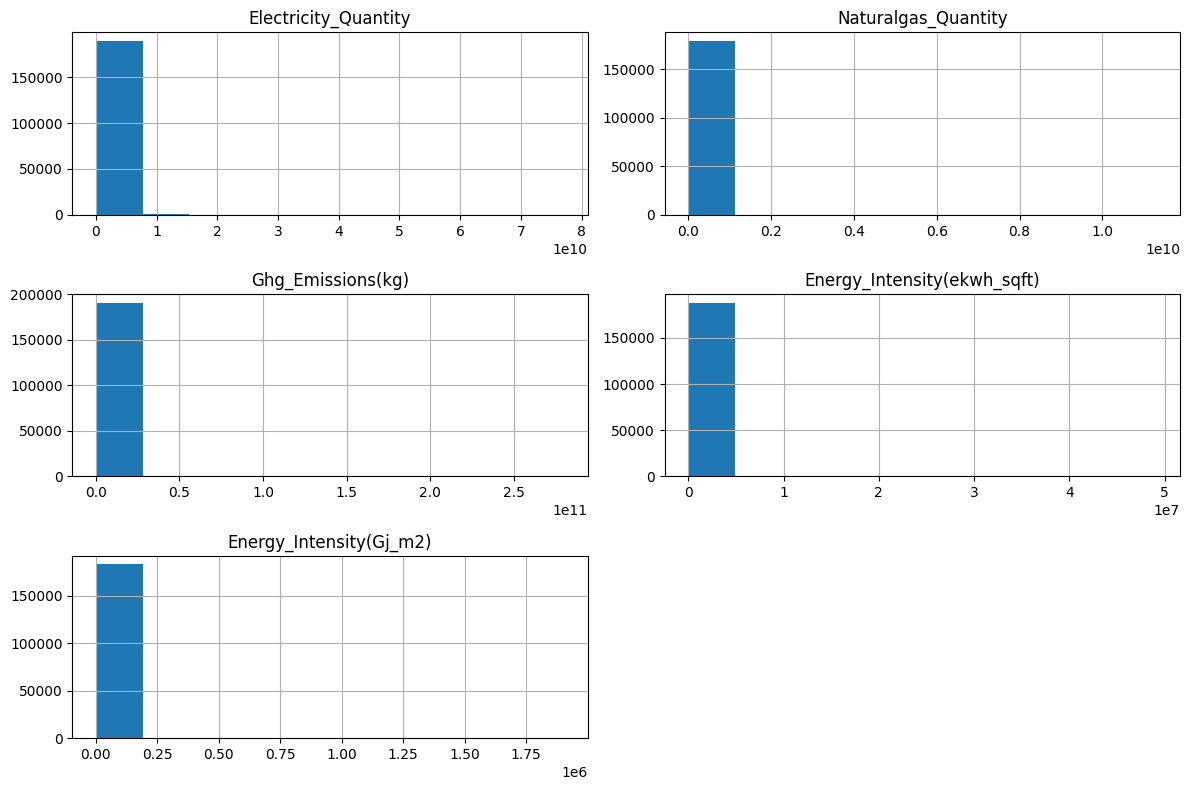

In [165]:
# Select numeric columns, then drop 'Year'
numeric_columns = Capstone_M.select_dtypes(include='number').columns.drop('Year')

# Plot histograms for the remaining numeric columns
Capstone_M[numeric_columns].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


**No insight can be derived from this distribution because the numeric features  span across  several orders of magnitude and are highly skewed, and this makes the  histograms appear “bunched up” on the lower end, making it hard to see the distribution**

**Then , we decided to log the variable and visualize again**

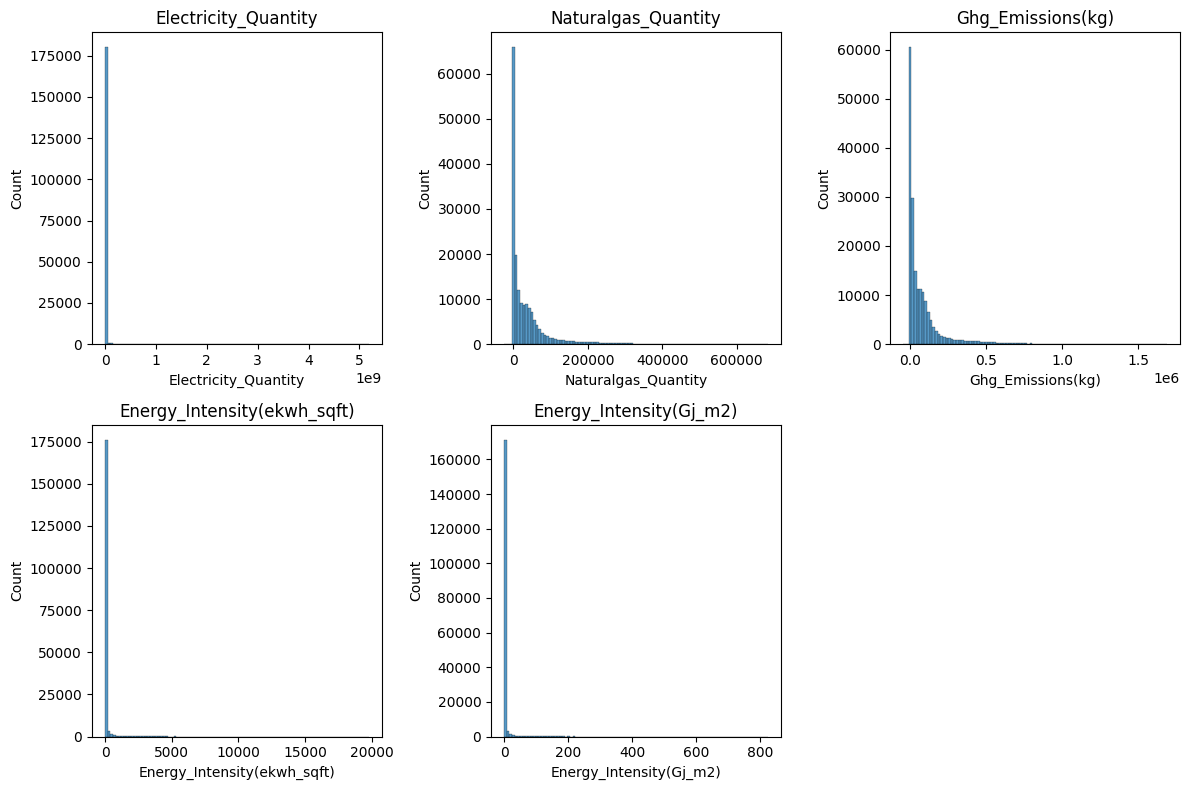

In [166]:
numeric_columns = Capstone_M.select_dtypes(include='number').columns.drop('Year')
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    
    data = Capstone_M[col].dropna()
    
    # Optional: filter out top 1% outliers
    upper_limit = data.quantile(0.99)
    data = data[data <= upper_limit]
    
    sns.histplot(data, bins=100)  # more bins for finer detail
    plt.title(col)

plt.tight_layout()
plt.show()


**Box Plots for Outlier Detection**

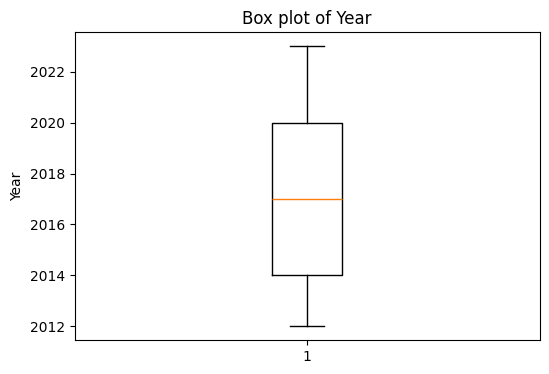

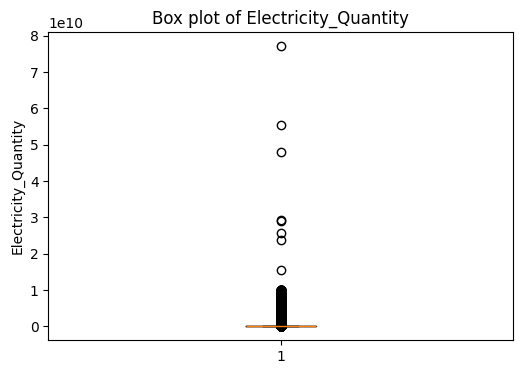

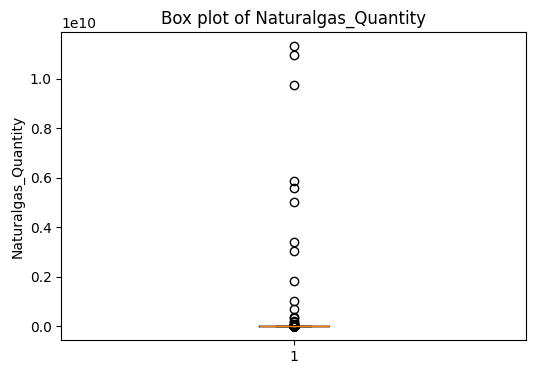

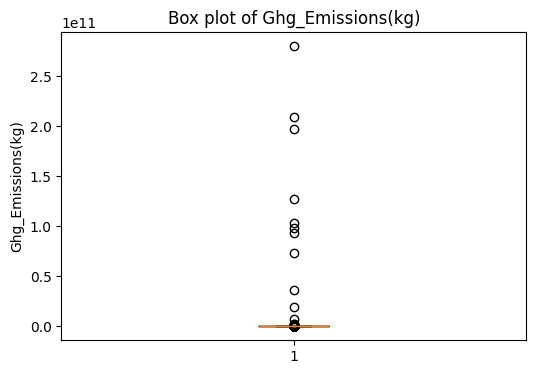

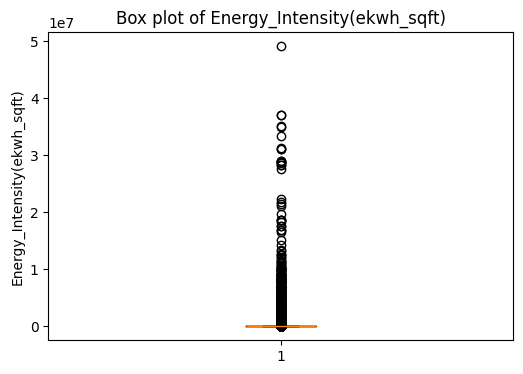

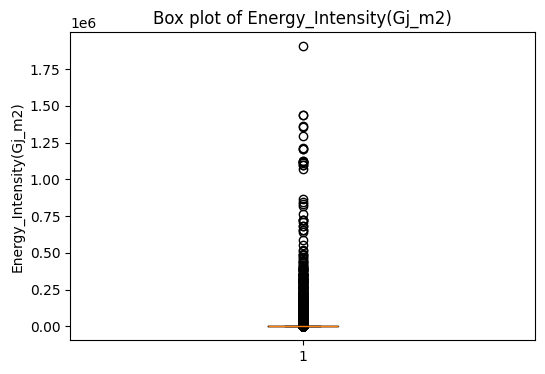

In [167]:

numeric_columns = Capstone_M.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(Capstone_M[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()


**The code here is to visualize the distributions of Categorical columns in a dataset. It provides an efficient way to explore the data visually and check the distribution of each feature.. The code alsod exclude 'Operation_Type', '0rganization' from the features because of large numbers of category**


Sector
Municipal                                 115327
School Board                               44700
Municipality                               10805
School Boards                               9707
Post-Secondary Educational Institution      6463
Public Hospital                             3950
Post-Secondary                               917
Post-Secondary Institution                   756
Hospital                                     439
Postsecondary                                340
Non-Bps                                      124
Name: count, dtype: int64


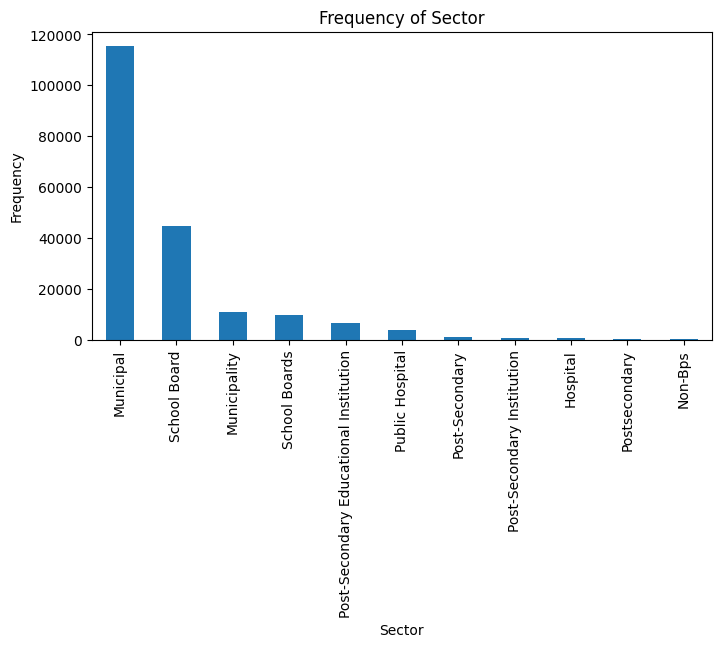

Subsector
Municipality               125529
School Board                44680
School Boards                9727
College                      6045
Acute Chronic Hospital       2496
University                   2441
Acute Chronic                 964
Municipal Service Board       581
Acute Hospital                416
Chronic Hospital              250
Acute                         136
Non-Bps                       124
Chronic                       100
Township                       30
Municipal                       4
Name: count, dtype: int64


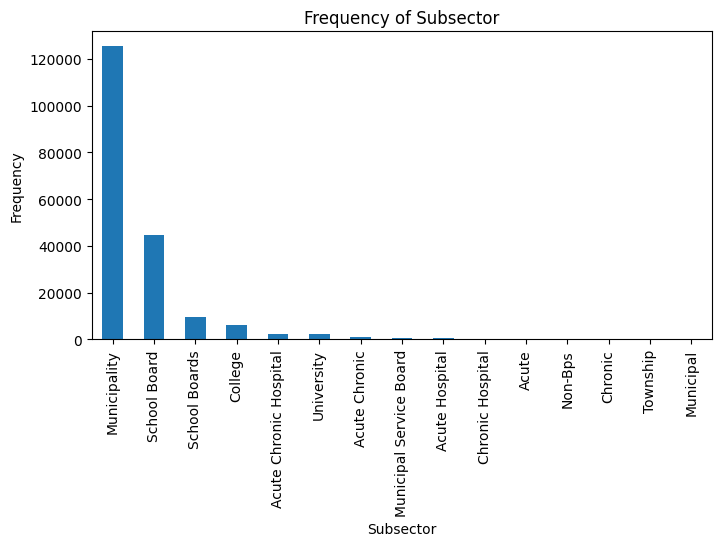

In [168]:
# Select categorical columns
categorical_columns = Capstone_M.select_dtypes(include=['object', 'category']).columns

# Exclude 'Operation_Type' and '0rganization'
categorical_columns = categorical_columns.drop(['Operation_Type', '0rganization','Operation','Address', 'City' ,'Postal_Code'])

# Plot value counts for each remaining categorical column
for col in categorical_columns:
    print(Capstone_M[col].value_counts())
    plt.figure(figsize=(8, 4))
    Capstone_M[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


**Therefore, the code below shows the top 10 categories for Operation_Type, 0rganization,Operation,Address, City ,Postal_Code**

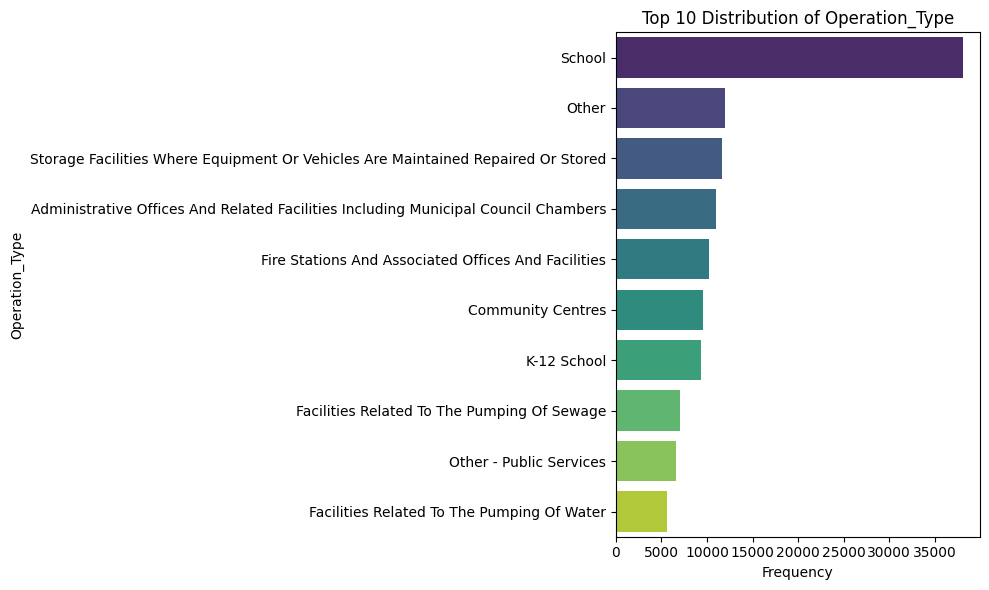

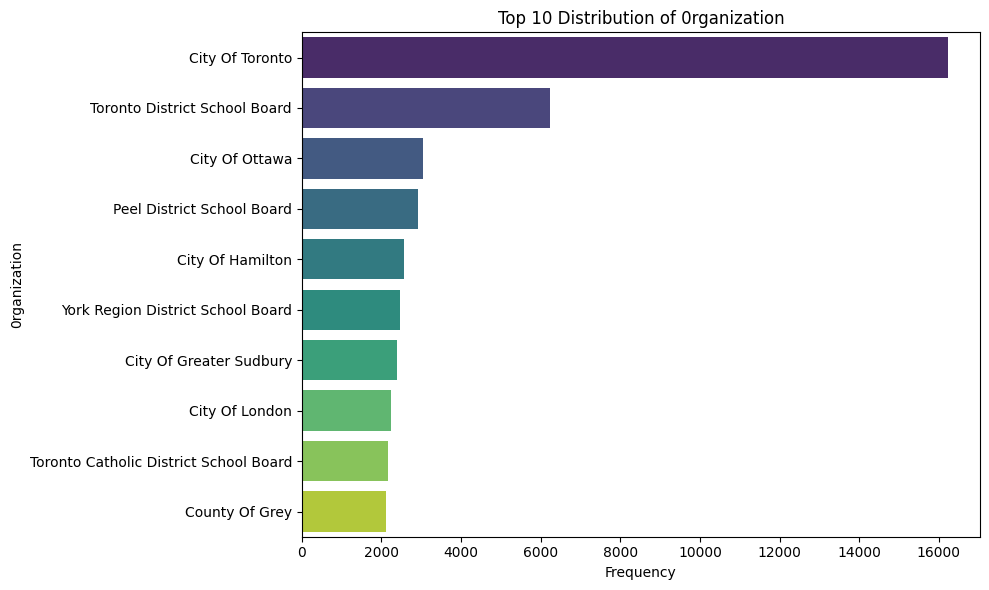

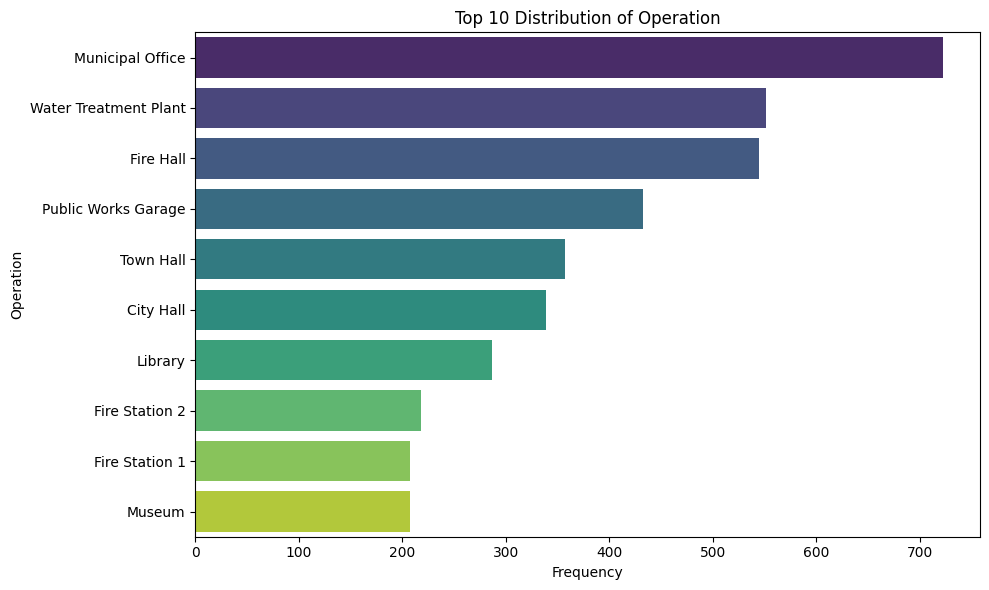

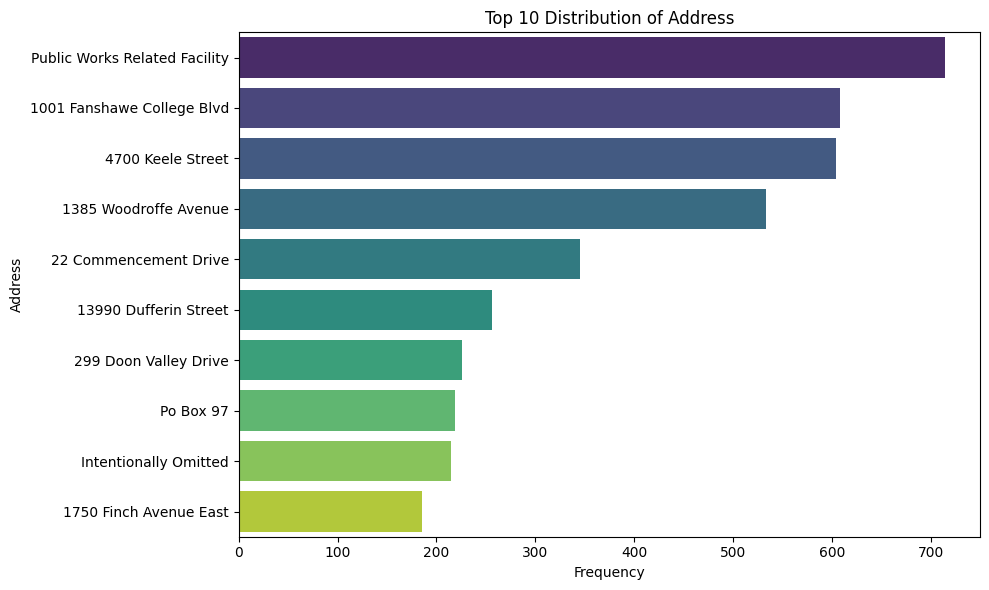

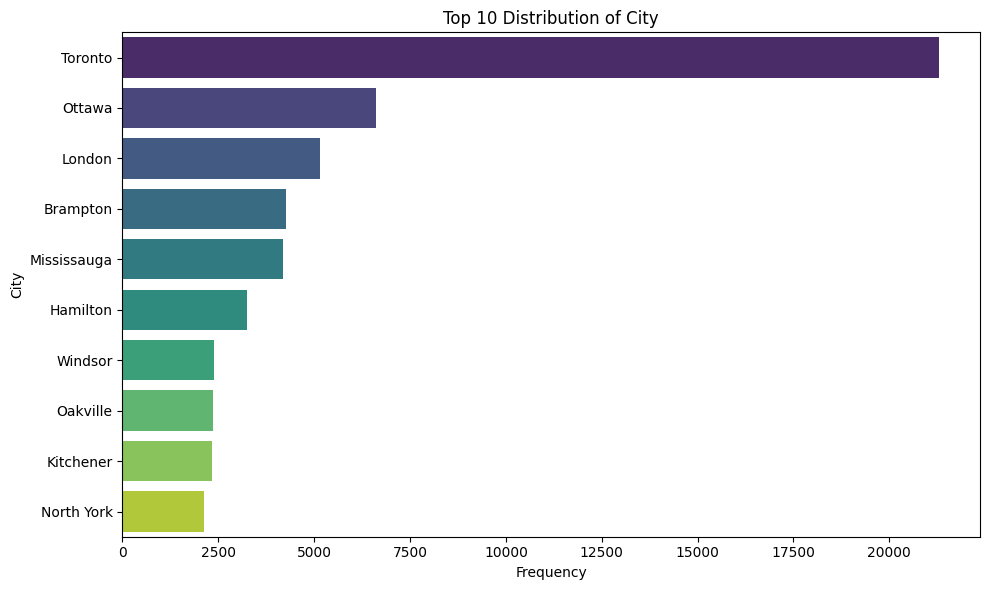

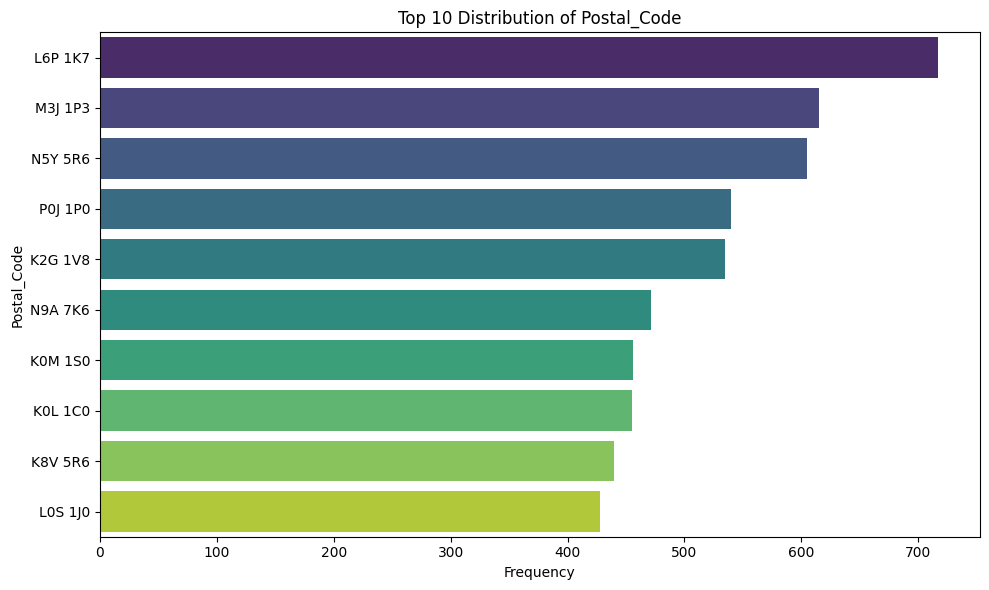

In [169]:
for col in ['Operation_Type', '0rganization','Operation','Address', 'City' ,'Postal_Code']:
    # Get the top 10 most frequent values
    top_10 = Capstone_M[col].value_counts().head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
    plt.title(f'Top 10 Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

**Groupby Statistics**

In [170]:
numeric_columns = Capstone_M.select_dtypes(include='number').columns
categorical_columns = Capstone_M.select_dtypes(include=['object', 'category']).columns

for cat_col in categorical_columns:
    print(Capstone_M.groupby(cat_col)[numeric_columns].mean())

                                               Year  Electricity_Quantity  \
Sector                                                                      
Hospital                                2013.000000          3.774151e+06   
Municipal                               2017.638992          1.029289e+08   
Municipality                            2013.000000          3.858932e+05   
Non-Bps                                 2022.500000          5.416208e+06   
Post-Secondary                          2022.498364          2.835558e+07   
Post-Secondary Educational Institution  2016.095621          2.523698e+08   
Post-Secondary Institution              2013.000000          2.514394e+06   
Postsecondary                           2021.000000          3.096207e+07   
Public Hospital                         2017.189114          1.276792e+08   
School Board                            2015.967204          3.582317e+08   
School Boards                           2021.500258          2.998010e+06   

**Correlation Matrix**

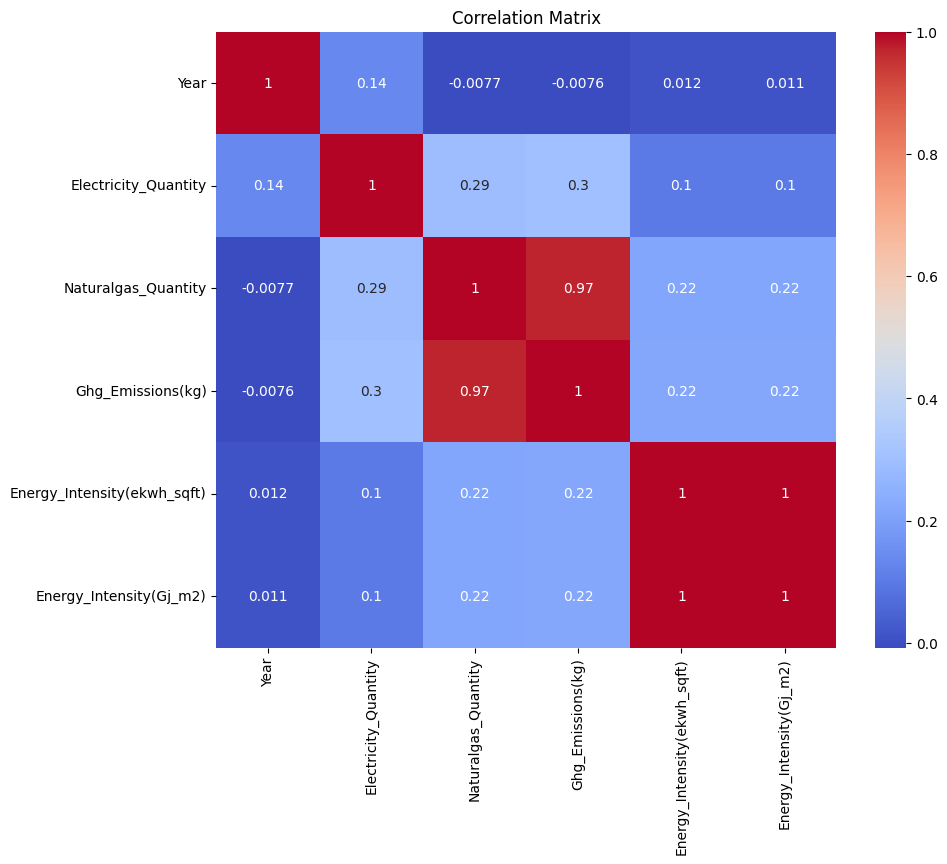

In [171]:


numeric_columns = Capstone_M.select_dtypes(include='number').columns
plt.figure(figsize=(10, 8))
sns.heatmap(Capstone_M[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**FIRST ANALYTICS QUESTION**

We begin the analysis by answering the first analytical question(Descriptive analysis)
which is how GHG emissions vary across different sectors and regions in Ontario?

**Summary Statistics by Sector**

In [172]:
sector_stats = Capstone_M.groupby('Sector')['Ghg_Emissions(kg)'].agg(['mean', 'median', 'var', 'count']).reset_index()
print("Summary statistics by Sector:")
print(sector_stats)

Summary statistics by Sector:
                                    Sector          mean        median  \
0                                 Hospital  1.585844e+06  378597.81250   
1                                Municipal  9.024163e+04   10729.71526   
2                             Municipality  7.936678e+04   14140.99763   
3                                  Non-Bps  7.298710e+04     900.00000   
4                           Post-Secondary  9.995081e+05   76200.00000   
5   Post-Secondary Educational Institution  7.523958e+05   68440.69476   
6               Post-Secondary Institution  1.062271e+06   92015.65992   
7                            Postsecondary  1.239336e+06  100200.00000   
8                          Public Hospital  4.407790e+06  503069.78440   
9                             School Board  2.796272e+07  100925.86955   
10                           School Boards  1.352883e+05   97200.00000   

             var   count  
0   1.016028e+13     439  
1   1.015964e+13  112737  


**Visualization: Average Emissions by Sector (Bar Chart)**

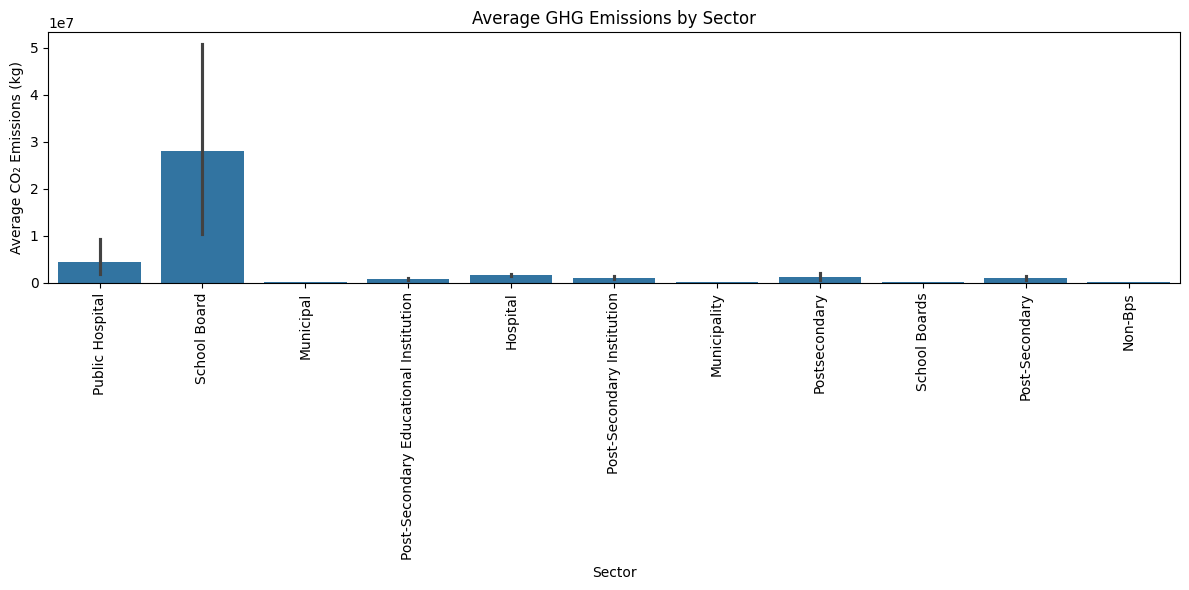

In [173]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='Ghg_Emissions(kg)', data=Capstone_M, estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=90)
plt.title('Average GHG Emissions by Sector')
plt.xlabel('Sector')
plt.ylabel('Average CO₂ Emissions (kg)')
plt.tight_layout()
plt.show()


**Visualization: Average Emissions by  Top 20 Cities and Sector (Heatmap)**

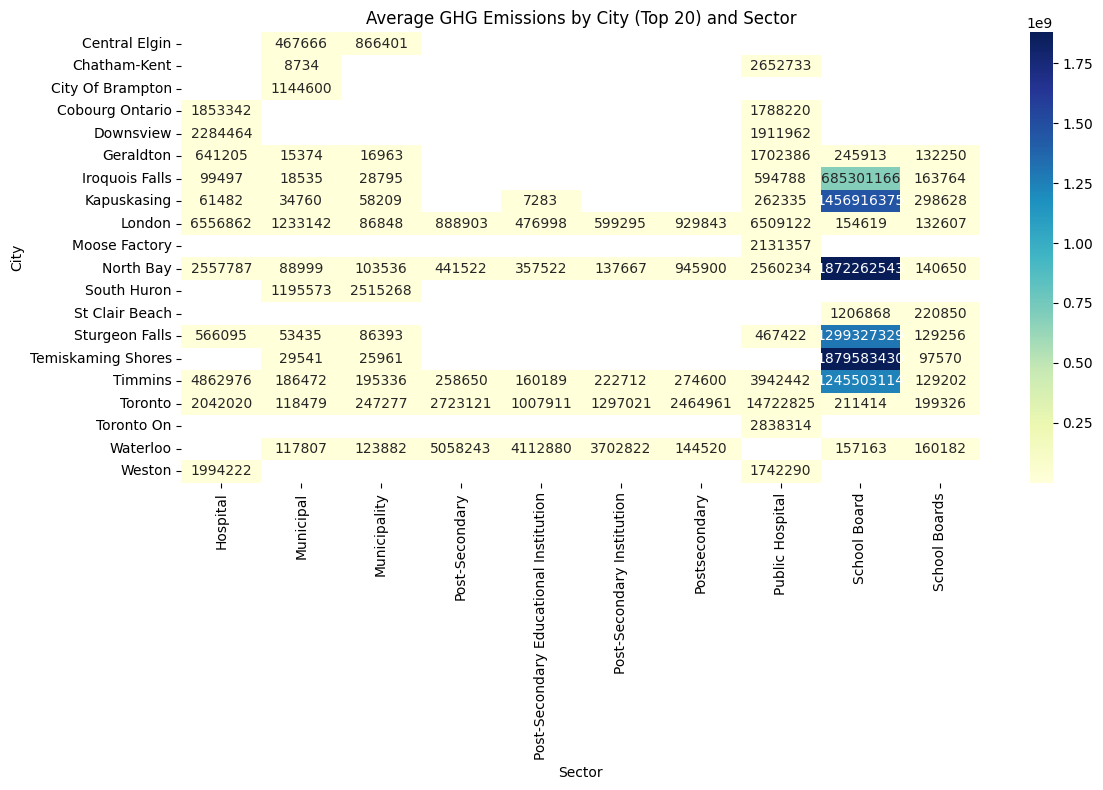

In [174]:

# Identify top 20 cities by average emissions
top_cities = (
    Capstone_M.groupby('City')['Ghg_Emissions(kg)']
    .mean()
    .nlargest(20)
    .index
)

# Filter the DataFrame to only include these top 20 cities
df_filtered = Capstone_M[Capstone_M['City'].isin(top_cities)]

# Create the pivot table for the heatmap
heatmap_data = df_filtered.groupby(['City', 'Sector'])['Ghg_Emissions(kg)'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average GHG Emissions by City (Top 20) and Sector')
plt.xlabel('Sector')
plt.ylabel('City')
plt.tight_layout()
plt.show()


**Visualization: Yearly Total Emissions (Time Series Plot)**

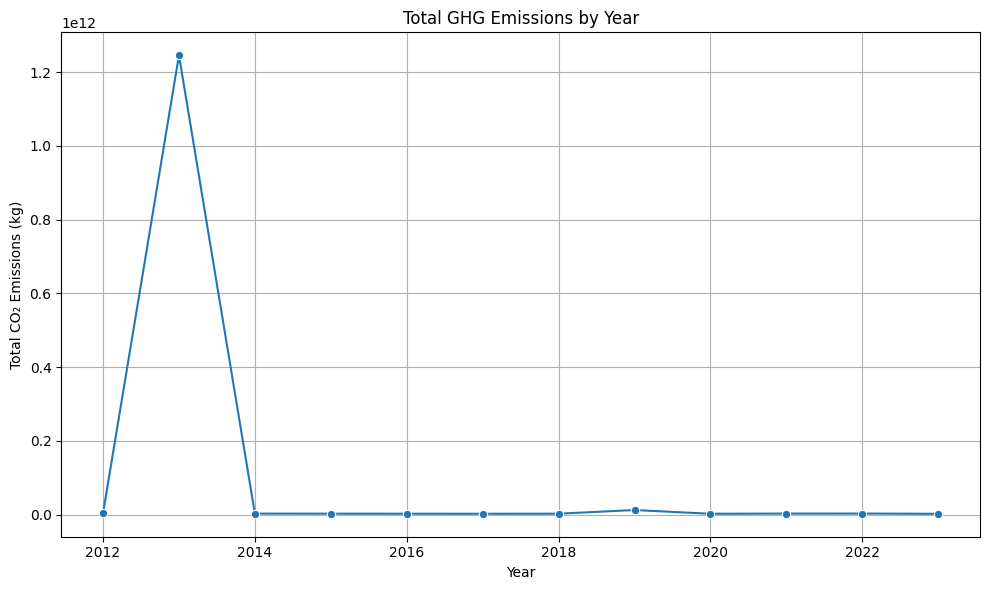

In [175]:
yearly_emissions = Capstone_M.groupby('Year')['Ghg_Emissions(kg)'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Ghg_Emissions(kg)', data=yearly_emissions, marker='o')
plt.title('Total GHG Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (kg)')
plt.grid(True)
plt.tight_layout()
plt.show()

**SECOND ANALYTICS QUESTION**

Let proceed with the second Question (Diagnosis Analysis)
Which is to identify the primary drivers of high GHG emissions within these sectors?

To achieve this there is need to conduct a correlation analysis, 
regression analysis, and a clustering approach to help 
uncover key factors affecting emissions.

**The code below Ensure necessary numeric columns are converted properly**

In [178]:

Capstone_M['Ghg_Emissions(kg)'] = pd.to_numeric(Capstone_M['Ghg_Emissions(kg)'], errors='coerce')
Capstone_M['Electricity_Quantity'] = pd.to_numeric(Capstone_M['Electricity_Quantity'], errors='coerce')
Capstone_M['Naturalgas_Quantity'] = pd.to_numeric(Capstone_M['Naturalgas_Quantity'], errors='coerce')  # Note: Adjust spelling if necessary


**Create a subset of data with the key columns for analysis**

In [179]:

cols = ['Electricity_Quantity', 'Naturalgas_Quantity', 'Ghg_Emissions(kg)', 
        'Subsector', 'Operation_Type', 'City', 'Postal_Code']
df_drivers = Capstone_M[cols].dropna()

**Correlation Analysis: Energy Consumption vs Emissions**

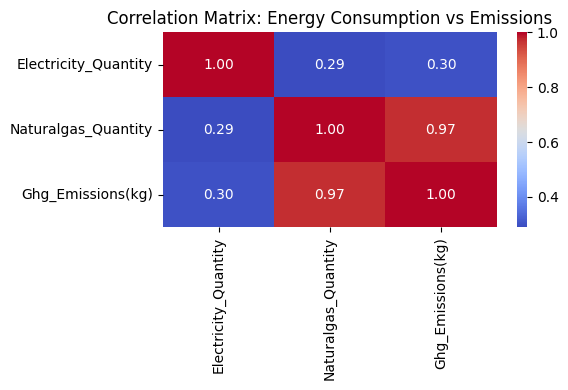

In [180]:

corr_matrix = df_drivers[['Electricity_Quantity', 'Naturalgas_Quantity', 'Ghg_Emissions(kg)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Energy Consumption vs Emissions')
plt.tight_layout()
plt.show()


**Regression Analysis: Quantify the Impact of Energy Consumption on Emissions**

In [181]:
# Define predictors and target variable
X = df_drivers[['Electricity_Quantity', 'Naturalgas_Quantity']]
y = df_drivers['Ghg_Emissions(kg)']

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Ghg_Emissions(kg)   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.478e+06
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:51:14   Log-Likelihood:            -3.7042e+06
No. Observations:              178102   AIC:                         7.408e+06
Df Residuals:                  178099   BIC:                         7.408e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.033e+06 

 **Segment Data by Sector: Analyze Emissions by Subsect**

In [182]:
#Calculate average CO₂ emissions by Subsector
subsector_stats = df_drivers.groupby('Subsector')['Ghg_Emissions(kg)'].mean().reset_index()
print("Average CO₂ Emissions by Subsector:")
print(subsector_stats)

Average CO₂ Emissions by Subsector:
                  Subsector  Ghg_Emissions(kg)
0                     Acute       2.793566e+06
1             Acute Chronic       2.234423e+06
2    Acute Chronic Hospital       1.847604e+06
3            Acute Hospital       2.531443e+07
4                   Chronic       1.364496e+06
5          Chronic Hospital       1.580259e+06
6                   College       2.046239e+05
7                 Municipal       1.789258e+04
8   Municipal Service Board       1.242353e+05
9              Municipality       8.146384e+04
10                  Non-Bps       2.139951e+05
11             School Board       2.797444e+07
12            School Boards       1.459225e+05
13                 Township       8.750063e+03
14               University       2.406987e+06



**Visualize the average emissions by Subsector with a bar chart**

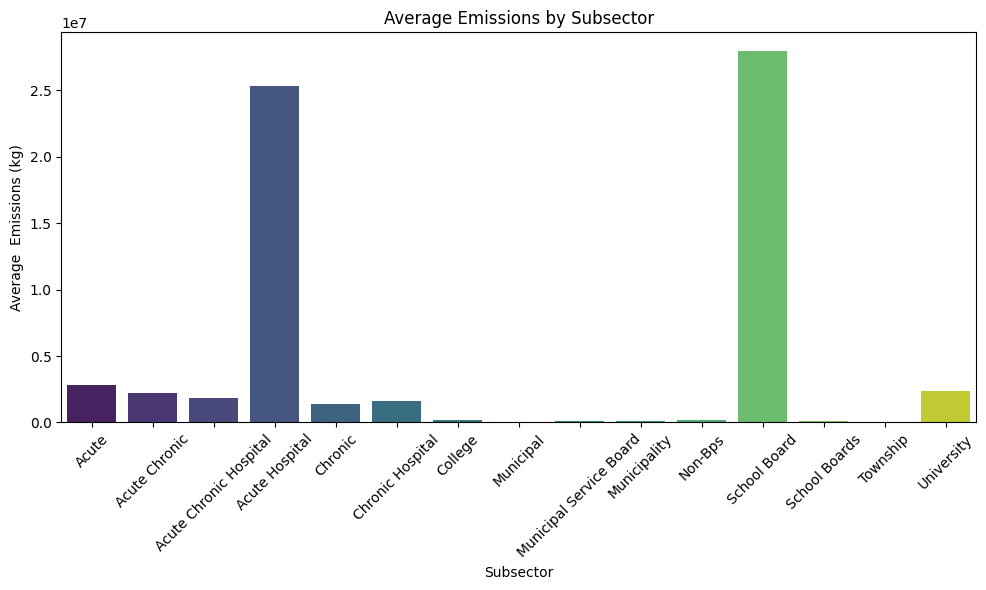

In [183]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Subsector', y='Ghg_Emissions(kg)', data=subsector_stats, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Emissions by Subsector')
plt.xlabel('Subsector')
plt.ylabel('Average  Emissions (kg)')
plt.tight_layout()
plt.show()

**Clustering Analysis: Group Facilities with Similar Emission Patterns**

**Select features for clustering (operational data and emissions) and  Standard the scale**

In [184]:
#Initialize the features 
features = df_drivers[['Electricity_Quantity', 'Naturalgas_Quantity', 'Ghg_Emissions(kg)']]

# Scale features to ensure equal weighting
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**Apply Kmeans clustering**

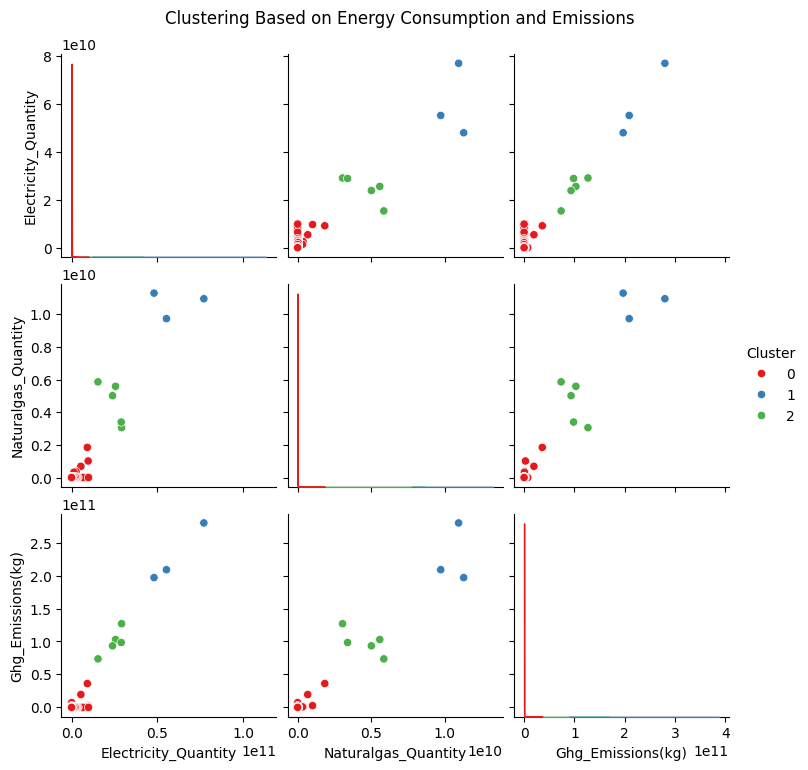

In [185]:
# Apply KMeans clustering (example: 3 clusters; adjust based on your data exploration)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df_drivers['Cluster'] = clusters

# Visualize clusters using a pairplot, with cluster as hue
sns.pairplot(df_drivers, vars=['Electricity_Quantity', 'Naturalgas_Quantity', 'Ghg_Emissions(kg)'], 
             hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Clustering Based on Energy Consumption and Emissions', y=1.02)
plt.show()

**THIRD ANALYTICAL QUESTION**

Let proceed with the third analytical question, which is to investigate 
How will emissions trends evolve if current practices continue?

To achieve this, we will need to conduct predictive analysis, which will be done 
by building three predictive models which are Linear Regression, Random Forest and  XGBoost

To begin with, we need to do some data cleaning and processing

**DATA PREPROCESSING AND CLEANING**

From the Exploratory analysis done earlier,we can see that the variables need some transformation
and we have to deal with the outlier as we can see from  the box plot

Here We addressed skewed distributions in the dataset by applying different transformations based on the extent of the skewness. These transformations ensure that the data is appropriately adjusted, making it suitable for use in machine learning models.

**PREPROCESSING THE NUMERCAL VARIABLE**

In [186]:
# Calculate skewness for all numeric columns (excluding objects)
skewness_values = Capstone_M.select_dtypes(exclude=['object']).skew()

for col in Capstone_M.select_dtypes(exclude=['object']).columns:
    if col == 'class':  # Skip the 'class' column if present
        print(f"Skipping column '{col}' as it is a categorical variable, the dependent variable.")
        continue  

    skewness = skewness_values[col]
    print(f"Processing column '{col}' with skewness: {skewness:.4f}")

    if skewness >= 5:  # Extremely positively skewed
        print(f"Column '{col}' has extreme skewness (>5). Attempting Box-Cox transformation.")
        try:
            # Check for non-positive values and shift if necessary
            min_val = Capstone_M[col].min()
            if min_val <= 0:
                shift = abs(min_val) + 1e-6
                transformed, lambda_val = boxcox(Capstone_M[col] + shift)
                print(f"Shifted '{col}' by {shift:.6f}. Applied Box-Cox transformation with lambda: {lambda_val:.4f}")
            else:
                transformed, lambda_val = boxcox(Capstone_M[col] + 1)  # Add 1 to avoid zeros
                print(f"Applied Box-Cox transformation to '{col}' with lambda: {lambda_val:.4f}")
            Capstone_M[col] = transformed
        except Exception as e:
            print(f"Box-Cox transformation failed for '{col}' due to: {e}. Applying log transformation instead.")
            Capstone_M[col] = np.log1p(Capstone_M[col])
    
    elif 3 < skewness < 5:  # Highly positively skewed
        print(f"Column '{col}' is highly positively skewed (>3). Applying log transformation.")
        Capstone_M[col] = np.log1p(Capstone_M[col])  # log(1 + x)
    
    elif 1 < skewness <= 3:  # Moderately positively skewed
        print(f"Column '{col}' is moderately positively skewed (>1). Applying square root transformation.")
        Capstone_M[col] = np.sqrt(Capstone_M[col])
    
    elif -1 < skewness <= 1:  # Approximately symmetric
        print(f"Column '{col}' is approximately symmetric. No transformation applied.")
    
    elif -3 <= skewness < -1:  # Highly negatively skewed
        print(f"Column '{col}' is highly negatively skewed (<-1). Applying reflection + log transformation.")
        max_value = Capstone_M[col].max()
        Capstone_M[col] = np.log1p(max_value - Capstone_M[col])  # log(1 + max_value - x)
    
    elif skewness < -3:  # Extremely negatively skewed
        print(f"Column '{col}' has extreme negative skewness (<-3). Applying reflection + Box-Cox transformation.")
        max_value = Capstone_M[col].max()
        try:
            transformed, lambda_val = boxcox(max_value - Capstone_M[col] + 1)
            print(f"Applied reflection + Box-Cox transformation to '{col}' with lambda: {lambda_val:.4f}")
            Capstone_M[col] = transformed
        except Exception as e:
            print(f"Reflection + Box-Cox transformation failed for '{col}' due to: {e}. Applying reflection + log transformation instead.")
            Capstone_M[col] = np.log1p(max_value - Capstone_M[col])
    
    else:  # If skewness is very close to 0 (symmetric)
        print(f"Column '{col}' is approximately symmetric or no transformation needed.")


Processing column 'Year' with skewness: 0.0753
Column 'Year' is approximately symmetric. No transformation applied.
Processing column 'Electricity_Quantity' with skewness: 11.7720
Column 'Electricity_Quantity' has extreme skewness (>5). Attempting Box-Cox transformation.


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\special\_logsumexp.py:128: RuntimeWarning: invalid value encountered in log
  out = np.log(s)


Box-Cox transformation failed for 'Electricity_Quantity' due to: The algorithm terminated without finding a valid bracket. Consider trying different initial points.. Applying log transformation instead.
Processing column 'Naturalgas_Quantity' with skewness: 182.9450
Column 'Naturalgas_Quantity' has extreme skewness (>5). Attempting Box-Cox transformation.
Box-Cox transformation failed for 'Naturalgas_Quantity' due to: The algorithm terminated without finding a valid bracket. Consider trying different initial points.. Applying log transformation instead.
Processing column 'Ghg_Emissions(kg)' with skewness: 195.6253
Column 'Ghg_Emissions(kg)' has extreme skewness (>5). Attempting Box-Cox transformation.


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Box-Cox transformation failed for 'Ghg_Emissions(kg)' due to: The algorithm terminated without finding a valid bracket. Consider trying different initial points.. Applying log transformation instead.
Processing column 'Energy_Intensity(ekwh_sqft)' with skewness: 57.0486
Column 'Energy_Intensity(ekwh_sqft)' has extreme skewness (>5). Attempting Box-Cox transformation.
Box-Cox transformation failed for 'Energy_Intensity(ekwh_sqft)' due to: The algorithm terminated without finding a valid bracket. Consider trying different initial points.. Applying log transformation instead.
Processing column 'Energy_Intensity(Gj_m2)' with skewness: 56.2224
Column 'Energy_Intensity(Gj_m2)' has extreme skewness (>5). Attempting Box-Cox transformation.
Box-Cox transformation failed for 'Energy_Intensity(Gj_m2)' due to: The algorithm terminated without finding a valid bracket. Consider trying different initial points.. Applying log transformation instead.


**Let recheck the distribution again** 

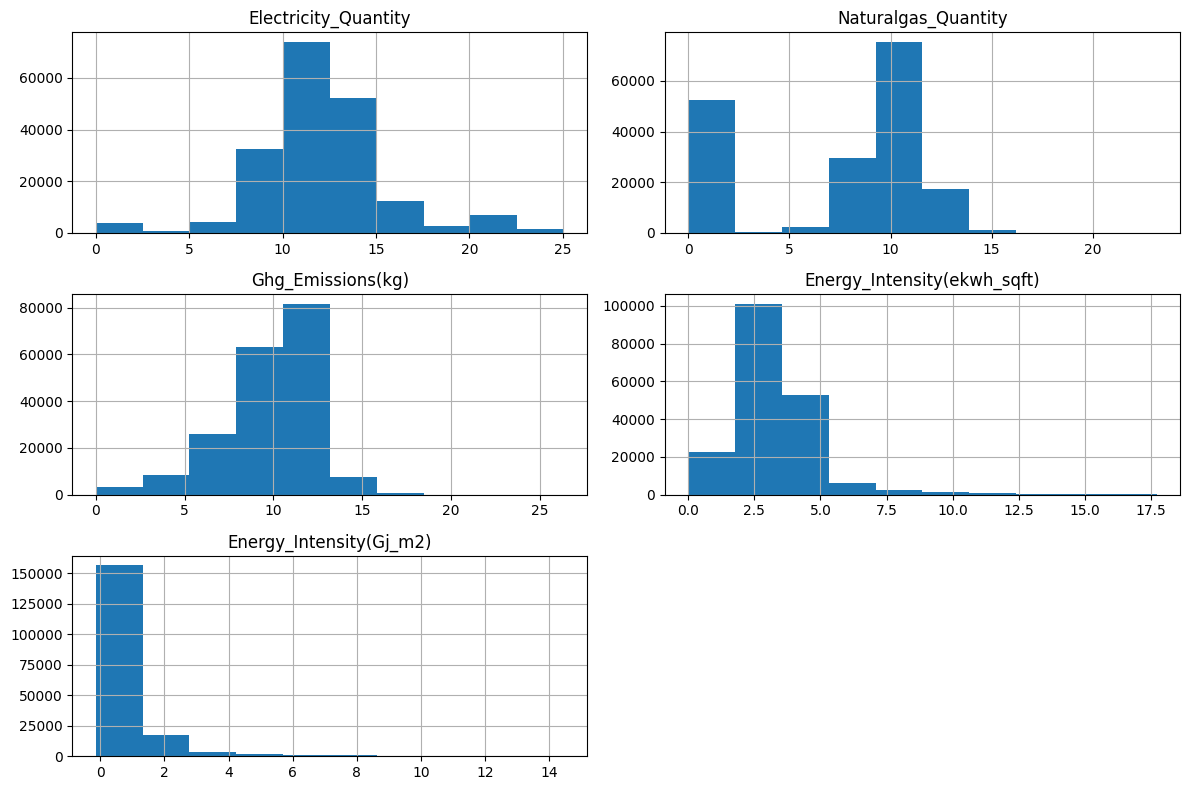

In [187]:
# Select numeric columns, then drop 'Year'
numeric_columns = Capstone_M.select_dtypes(include='number').columns.drop('Year')

# Plot histograms for the remaining numeric columns
Capstone_M[numeric_columns].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

**Let Recheck the box plot again for outliers** 

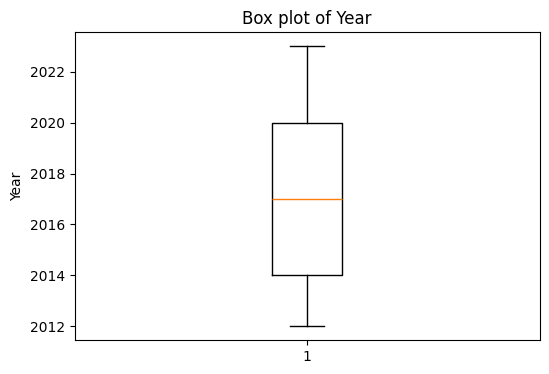

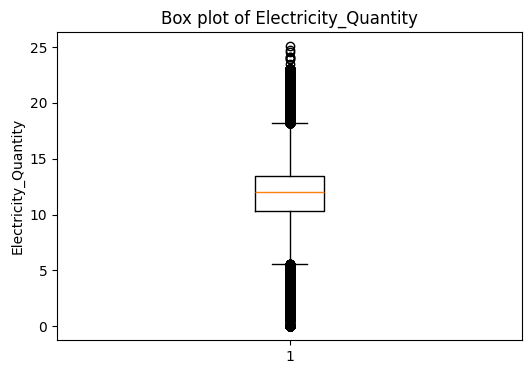

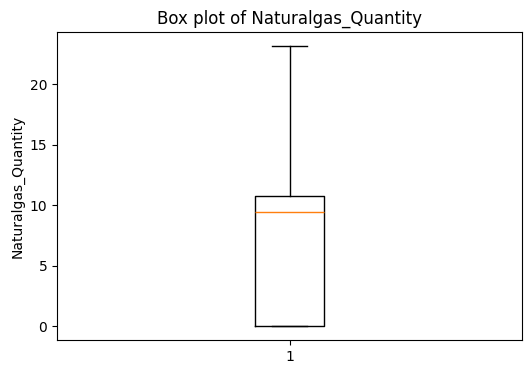

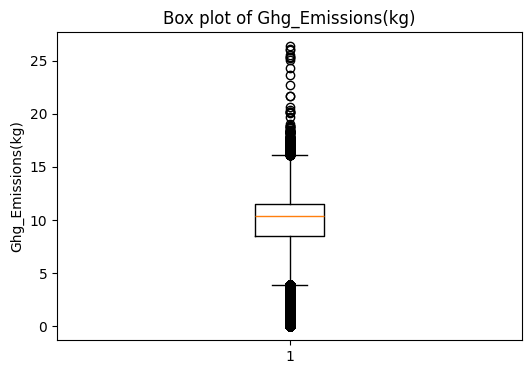

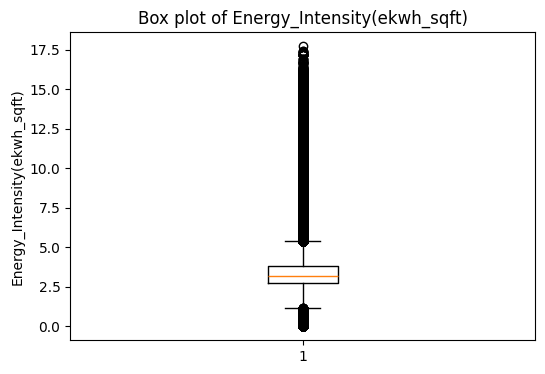

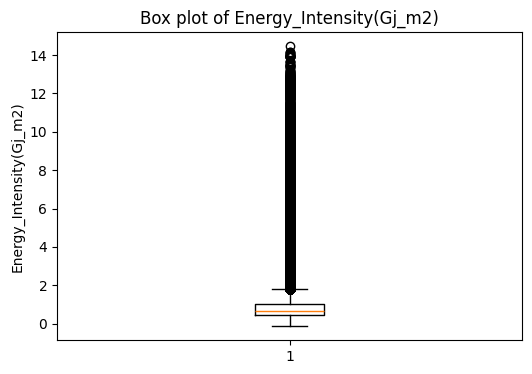

In [188]:
numeric_columns = Capstone_M.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(Capstone_M[col].dropna())
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

**Everything now looks good in terms of the distribution** 

**Also, Let unify the scale of the numerical variable**

In [189]:

# Select numerical columns and exclude the 'class' column if it exists
quantDataToScale = Capstone_M.select_dtypes(exclude=['object']).drop(columns=['Year'], errors='ignore').columns
print("Columns to be normalized:", quantDataToScale)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data for the selected numerical columns
normalized_data = scaler.fit_transform(Capstone_M[quantDataToScale])

# Create a DataFrame from the normalized data with "_normalized" suffix for the column names
normalized_df = pd.DataFrame(normalized_data, columns=[f"{col}_normalized" for col in quantDataToScale], index=Capstone_M.index)

# Replace the original columns in Capstone_M with the normalized values
Capstone_M[quantDataToScale] = normalized_df



Columns to be normalized: Index(['Electricity_Quantity', 'Naturalgas_Quantity', 'Ghg_Emissions(kg)',
       'Energy_Intensity(ekwh_sqft)', 'Energy_Intensity(Gj_m2)'],
      dtype='object')


**Check the Numerical summary**

In [190]:
# Select numeric columns and drop 'Year'
numeric_summary = Capstone_M.select_dtypes(include='number').drop(columns=['Year'], errors='ignore')

# Print the summary for these numeric columns
print(numeric_summary.describe())


       Electricity_Quantity  Naturalgas_Quantity  Ghg_Emissions(kg)  \
count         190560.000000        179004.000000      190831.000000   
mean               0.481025             0.310336           0.371096   
std                0.138075             0.207732           0.099879   
min                0.000000             0.000000           0.000000   
25%                0.409947             0.000000           0.322547   
50%                0.478495             0.408619           0.392495   
75%                0.535860             0.465632           0.438332   
max                1.000000             1.000000           1.000000   

       Energy_Intensity(ekwh_sqft)  Energy_Intensity(Gj_m2)  
count                188357.000000            182943.000000  
mean                      0.183711                 0.073837  
std                       0.097801                 0.080234  
min                       0.000000                 0.000000  
25%                       0.154030                

**Check the Correlation Matrix for the Numerical Variable**

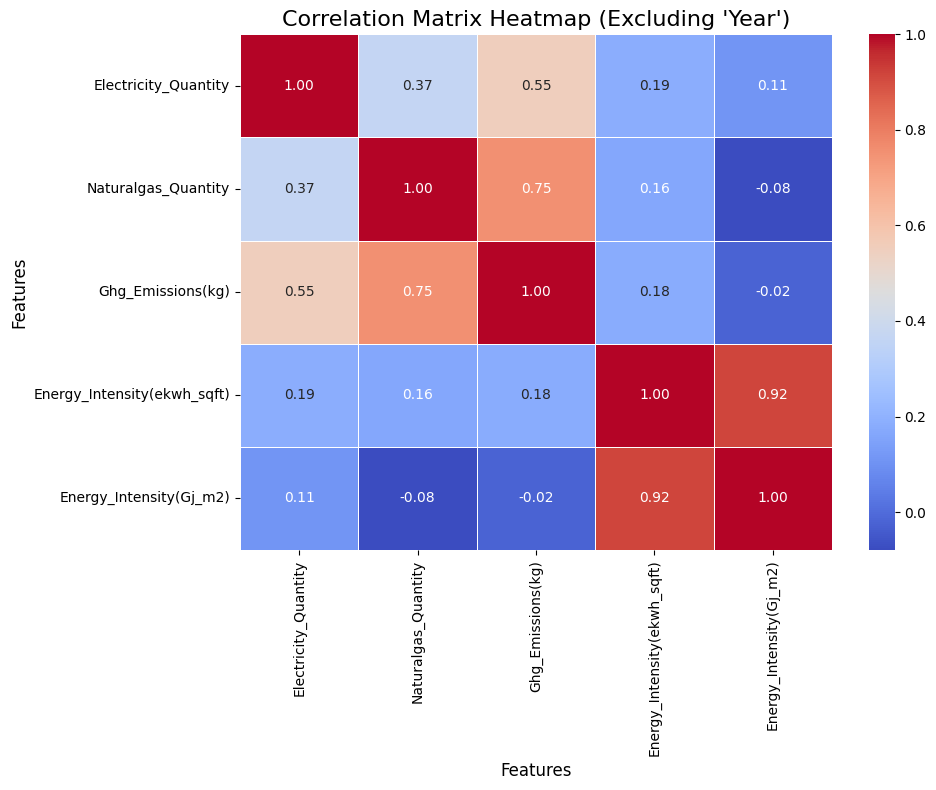

In [191]:
# Extract numeric columns from Capstone_M
numeric_cols = Capstone_M.select_dtypes(exclude=['object']).columns

# Exclude the 'Year' column if it exists
numeric_cols = numeric_cols.drop('Year', errors='ignore')

# Calculate the correlation matrix for the selected numeric columns
correlation_matrix = Capstone_M[numeric_cols].corr(method='pearson', min_periods=1)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title("Correlation Matrix Heatmap (Excluding 'Year')", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Adjust layout and display the heatmap
plt.tight_layout()
plt.show()



**LET'S BEGIN WITH PREPROCESSING THE CATEGORICAL VARIABLE**

**Converting the categrical features to numeric**

In [192]:


# Identify categorical columns
categorical_columns = Capstone_M.select_dtypes(include=['category']).columns

# Print cardinality for each categorical column
for col in categorical_columns:
    print(f"{col}: {Capstone_M[col].nunique()} unique values")

# Define a threshold for low cardinality (e.g., <100 unique values)
low_cardinality_cols = [col for col in categorical_columns if Capstone_M[col].nunique() < 100]

# Apply one-hot encoding (with sparse output) only on low cardinality columns
Capstone_M_encoded = pd.get_dummies(Capstone_M, columns=low_cardinality_cols, drop_first=True, sparse=True)

# Display the first few rows and the shape of the encoded DataFrame
print(Capstone_M_encoded.head())
print("Encoded DataFrame shape:", Capstone_M_encoded.shape)
import pandas as pd

# Identify categorical columns
categorical_columns = Capstone_M.select_dtypes(include=['category']).columns

# Print cardinality for each categorical column
for col in categorical_columns:
    print(f"{col}: {Capstone_M[col].nunique()} unique values")

# Define a threshold for low cardinality (e.g., <100 unique values)
low_cardinality_cols = [col for col in categorical_columns if Capstone_M[col].nunique() < 100]

# Apply one-hot encoding (with sparse output) only on low cardinality columns
Capstone_M_encoded = pd.get_dummies(Capstone_M, columns=low_cardinality_cols, drop_first=True, sparse=True)

# Display the first few rows and the shape of the encoded DataFrame
print(Capstone_M_encoded.head())
print("Encoded DataFrame shape:", Capstone_M_encoded.shape)


   Year           Sector      Subsector  \
0  2012  Public Hospital  Acute Chronic   
1  2012  Public Hospital  Acute Chronic   
2  2012  Public Hospital  Acute Chronic   
3  2012  Public Hospital  Acute Chronic   
4  2012     School Board   School Board   

                             0rganization                    Operation  \
0                      Alexandra Hospital           Alexandra Hospital   
1                      Alexandra Hospital           Alexandra Hospital   
2  Alexandria Glengarry Memorial Hospital  Glengarry Memorial Hospital   
3  Alexandria Glengarry Memorial Hospital  Glengarry Memorial Hospital   
4            Algoma District School Board       Adult Ed - Blind River   

                                  Operation_Type               Address  \
0          Facilities Used For Hospital Purposes       29 Noxon Street   
1  Administrative Offices And Related Facilities       29 Noxon Street   
2          Facilities Used For Hospital Purposes  20260 County Road 43   


**FEATURE SELECTION**

**NUMERICAL FEATURE SELECTION**

**Linear Regression**: Naturalgas_Quantity will be selected since it has a stronger
individual correlation with Ghg_Emissions(target variable). and energy intensity
metrics (ekwh_sqft ) will also be selected.Since Electricity_Quantity and  Naturalgas_Quantity
are highly correlated, one of them will be chosen

**Random Forest and XGBoost(Tree-based models )**: Since the algorithm is more roust to collinearity,
the electricity,natural gas consumption variables, and both energy intensity metrics will be included
and selection will be based on model performance 

**CATEGORICAL FEATURE SELECTION**

The following categorical feature will be selected base on domain knolwedge as **Sector** differentiates facility types; **Subsector** refines these distinctions; **City** adjusts for regional variations; **Postal_Code** further distinguishes geographic areas when aggregated appropriately; and **Operation** provides insight into specific facility activities.     

**Proceed with the Model Building**


**Load and Clean Data**

In [193]:
Capstone_M = pd.read_csv("Capstone_Main_Data.csv", encoding='latin1', low_memory=False)


**Replace all 'Not Available' with np.nan and covert numerical field**

In [194]:

Capstone_M.replace("Not Available", np.nan, inplace=True)

Capstone_M['Electricity_Quantity'] = pd.to_numeric(Capstone_M['Electricity_Quantity'], errors='coerce')
Capstone_M['Naturalgas_Quantity'] = pd.to_numeric(Capstone_M['Naturalgas_Quantity'], errors='coerce')
Capstone_M['Energy_Intensity(ekwh_sqft)'] = pd.to_numeric(Capstone_M['Energy_Intensity(ekwh_sqft)'], errors='coerce')
Capstone_M['Ghg_Emissions(kg)'] = pd.to_numeric(Capstone_M['Ghg_Emissions(kg)'], errors='coerce')

**Drop rows where the target is missing and  Subsample to reduce memory usage during training/testing**

In [195]:
Capstone_M = Capstone_M.dropna(subset=['Ghg_Emissions(kg)'])

Capstone_M = Capstone_M.sample(frac=0.5, random_state=42)

**Define Features and Target**

In [196]:

target = 'Ghg_Emissions(kg)'

# One-hot encode Operation_Type (limit to first 5 categories if needed)
operation_dummies = pd.get_dummies(Capstone_M['Operation_Type'], prefix='Operation', drop_first=True)
operation_dummies = operation_dummies.iloc[:, :5]  # Optional: Limit to 5 for memory

# Join back to main DataFrame
Capstone_M = pd.concat([Capstone_M, operation_dummies], axis=1)


# Numeric features
features_lr_numeric = [
    'Electricity_Quantity',
    'Naturalgas_Quantity',
    'Energy_Intensity(ekwh_sqft)'
]

# One-hot encoded categorical column prefixes
categorical_prefixes = ['Sector_', 'Subsector_', 'City_', 'Postal_Code_''Operation_']
selected_cat_cols = []

for prefix in categorical_prefixes:
    cols = [col for col in Capstone_M.columns if col.startswith(prefix) and Capstone_M[col].dtype != 'object']
    cols = sorted(cols)[:5]  # ⬅ Reduce from 10 to 5 per category
    selected_cat_cols.extend(cols)


**Final features list**

In [197]:

features = features_lr_numeric + selected_cat_cols

print(" Selected features for modeling:")
print(features)

 Selected features for modeling:
['Electricity_Quantity', 'Naturalgas_Quantity', 'Energy_Intensity(ekwh_sqft)']


**Train/Test Split**

In [198]:
train_idx, test_idx = train_test_split(Capstone_M.index, test_size=0.2, random_state=42)

X_train = Capstone_M.loc[train_idx, features]
X_test = Capstone_M.loc[test_idx, features]
y_train = Capstone_M.loc[train_idx, target]
y_test = Capstone_M.loc[test_idx, target]

# === Step 5: Impute Missing Values ===
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

**Define and Train Models**

In [199]:
rf_model = RandomForestRegressor(
    n_estimators=50,     # Reduced from 100
    max_depth=10,        # Limit tree depth
    n_jobs=1,            # Limit threads
    random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=4,
    verbosity=0,
    random_state=42
)
# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

**Evaluate Models**

In [200]:

def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    print(f"\n {name} Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    return rmse, r2, preds

lr_rmse, lr_r2, lr_preds = evaluate_model("Linear Regression", lr_model, X_test, y_test)
rf_rmse, rf_r2, rf_preds = evaluate_model("Random Forest", rf_model, X_test, y_test)
xgb_rmse, xgb_r2, xgb_preds = evaluate_model("XGBoost Regressor", xgb_model, X_test, y_test)



 Linear Regression Results:
RMSE: 26092208.93
R²: 1.00

 Random Forest Results:
RMSE: 89481076.99
R²: 0.98

 XGBoost Regressor Results:
RMSE: 588878294.23
R²: 0.32


**Visualize Predictions vs Actual**

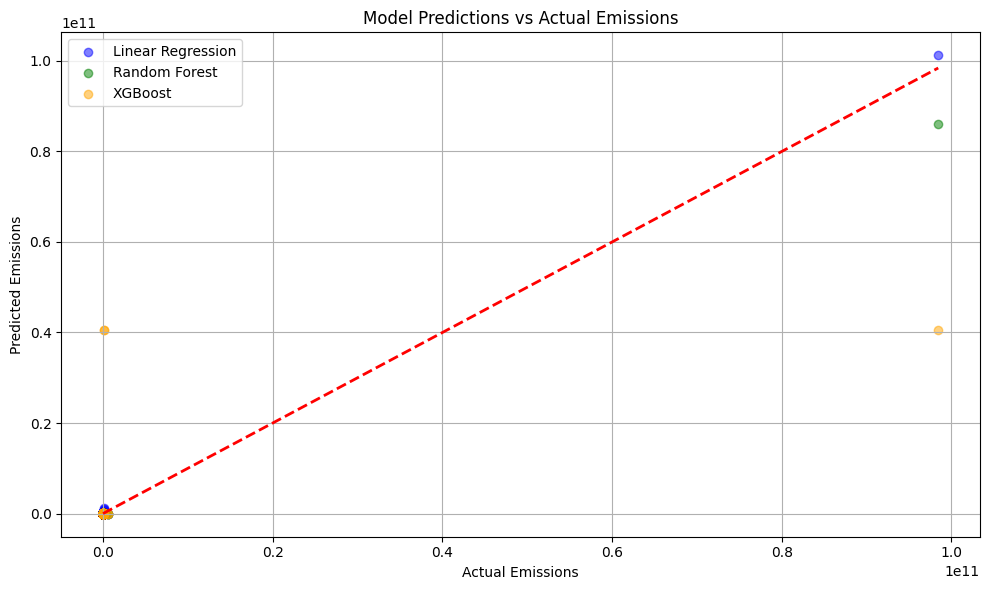

In [201]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_preds, alpha=0.5, label="Linear Regression", color='blue')
plt.scatter(y_test, rf_preds, alpha=0.5, label="Random Forest", color='green')
plt.scatter(y_test, xgb_preds, alpha=0.5, label="XGBoost", color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Model Predictions vs Actual Emissions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Model performance and Comparison**

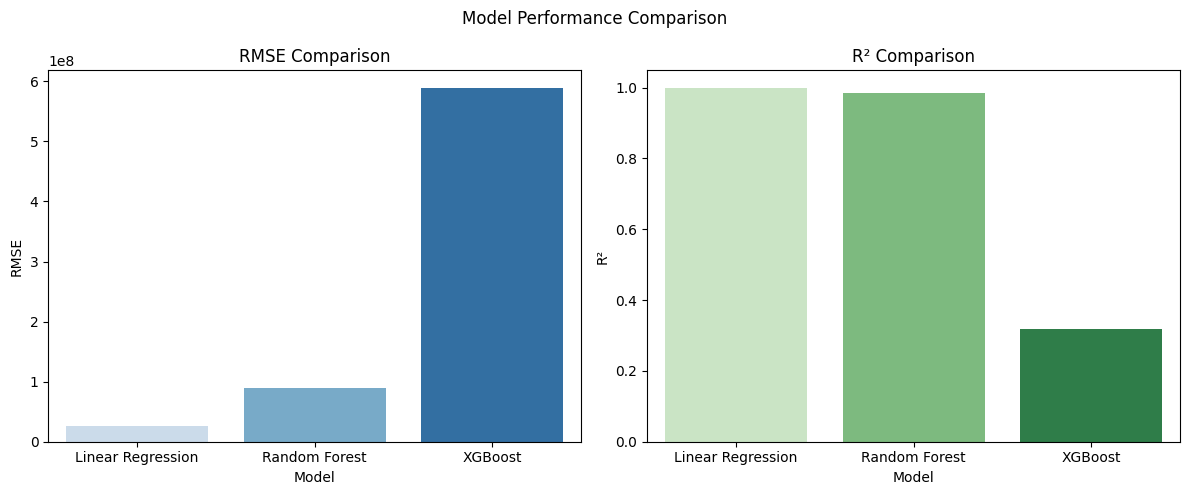

In [202]:
# === Step 9: Bar Chart of RMSE and R² ===
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse],
    'R²': [lr_r2, rf_r2, xgb_r2]
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data=results_df, x='Model', y='RMSE', ax=axes[0], palette='Blues')
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("RMSE")

sns.barplot(data=results_df, x='Model', y='R²', ax=axes[1], palette='Greens')
axes[1].set_title("R² Comparison")
axes[1].set_ylabel("R²")

plt.suptitle("Model Performance Comparison")
plt.tight_layout()
plt.show()

**Fourth Analytical Question**

Let's proceed with the fourth analytical question, which is to develop cost-benefit analyses for potential interventions (e.g, switching to renewable energy sources).?

To achieve this, we will build a simulation model to see the effect of switching to another energy mix, such as solar, and see the effect on emission reduction 



**Building the simulation Model**

The function below  simulates how much GHG emissions could be reduced by substituting a portion of grid electricity with solar energy

In [217]:
def simulate_emission_reduction(year, sector, electricity_kwh, natural_gas_m3, solar_pct, model, imputer, template_df):
    """
    Simulate GHG reduction by replacing some electricity usage with solar power.
    
    Parameters:
    - year: int
    - sector: str (must match an existing Operation_Type encoding)
    - electricity_kwh: float
    - natural_gas_m3: float
    - solar_pct: float (0 to 1)
    - model: trained model (e.g., rf_model)
    - imputer: fitted SimpleImputer
    - template_df: DataFrame with all the expected columns (structure of X_train)
    """

    grid_kwh = electricity_kwh * (1 - solar_pct)

    # Create a new input row (same structure as X_train)
    input_row = template_df.iloc[0:1].copy()
    input_row.loc[:, :] = 0  # Zero out everything

    # Fill known values
    input_row['Electricity_Quantity'] = grid_kwh
    input_row['Naturalgas_Quantity'] = natural_gas_m3

    # You can also adjust energy intensity if needed (or keep as is)

    # Encode Operation_Type
    for col in input_row.columns:
        if col.startswith('Operation_') and col.endswith(sector):
            input_row[col] = 1s

    # Impute missing if needed
    input_row_imputed = pd.DataFrame(imputer.transform(input_row), columns=input_row.columns)

    # Predict emission
    predicted_emission = model.predict(input_row_imputed)[0]

    # Now repeat with original electricity (no solar offset)
    original_row = input_row.copy()
    original_row['Electricity_Quantity'] = electricity_kwh
    original_row_imputed = pd.DataFrame(imputer.transform(original_row), columns=original_row.columns)

    original_emission = model.predict(original_row_imputed)[0]

    reduction = original_emission - predicted_emission
    print(f"Replaced {solar_pct*100:.0f}% with solar → Emission reduction: {reduction:,.2f} kg GHG")
    return reduction

SyntaxError: invalid decimal literal (1878528032.py, line 31)

**Print the unique element in the sector column**

In [205]:
Capstone_M['Sector'].unique()

array(['School Boards', 'Municipality', 'Municipal', 'Post-Secondary ',
       'School Board', 'Public Hospital',
       'Post-Secondary Educational Institution',
       'Post-secondary Educational Institution',
       'Post-Secondary Institution', 'Hospital', 'Postsecondary',
       'Non-BPS'], dtype=object)

**Calling the simulate_emission_reduction function to estimate how much greenhouse gas (GHG) emission reduction you could achieve by substituting a portion of grid electricity with solar power.**

In [206]:
simulate_emission_reduction(
    year=2025,
    sector="Hospital",  # This must match a known Operation_Type suffix
    electricity_kwh=500000,
    natural_gas_m3=200000,
    solar_pct=0.5,
    model=rf_model,
    imputer=imputer,
    template_df=X_train
)

Replaced 50% with solar → Emission reduction: 5,525.56 kg GHG


5525.560845928878

**Create a list of solar replacement percentages**

In [214]:
# --- Create a list of solar replacement percentages ---
solar_levels = [i / 10 for i in range(11)]  # 0.0 to 1.0

# --- Store results here ---
emission_reductions = []

 **Looping through Simulate Emission Reduction for Each Level**

In [218]:
# --- Loop through solar levels and simulate ---
for pct in solar_levels:
    reduction = simulate_emission_reduction(
        year=2025,
        sector="Hospital",                 # Must match Operation_Type encoded column suffix
        electricity_kwh=500000,            # Use real estimates if available
        natural_gas_m3=200000,
        solar_pct=pct,
        model=rf_model,
        imputer=imputer,
        template_df=X_train
    )
    emission_reductions.append(reduction)


Replaced 0% with solar → Emission reduction: 0.00 kg GHG
Replaced 10% with solar → Emission reduction: 5,525.56 kg GHG
Replaced 20% with solar → Emission reduction: 5,525.56 kg GHG
Replaced 30% with solar → Emission reduction: 5,525.56 kg GHG
Replaced 40% with solar → Emission reduction: 5,525.56 kg GHG
Replaced 50% with solar → Emission reduction: 5,525.56 kg GHG
Replaced 60% with solar → Emission reduction: 5,525.56 kg GHG
Replaced 70% with solar → Emission reduction: 5,525.56 kg GHG
Replaced 80% with solar → Emission reduction: 9,854.50 kg GHG
Replaced 90% with solar → Emission reduction: 9,854.50 kg GHG
Replaced 100% with solar → Emission reduction: -90,123.65 kg GHG


**visuals impact of switching to solar energy and emission reduction**

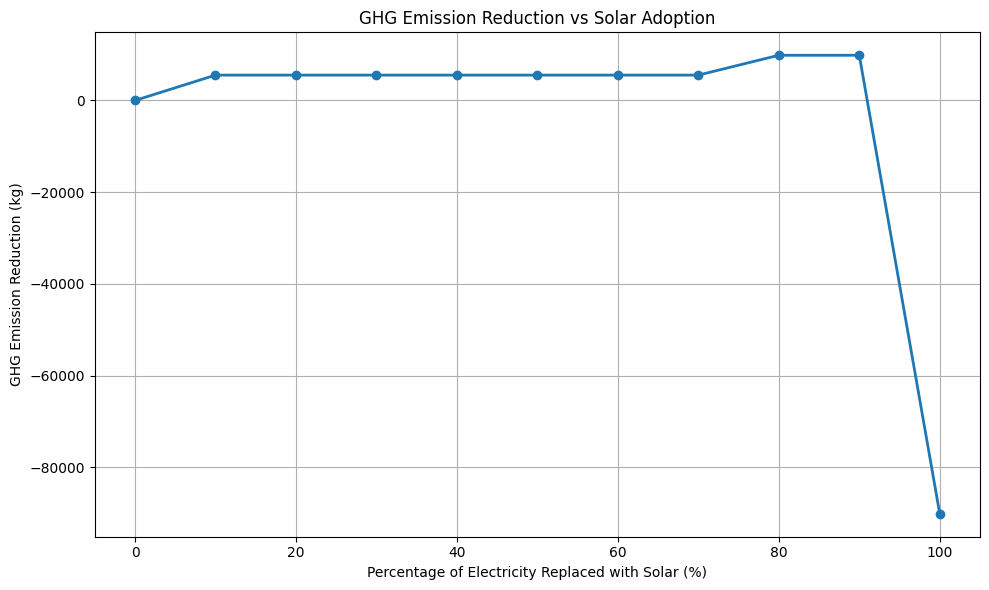

In [216]:
# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot([p * 100 for p in solar_levels], emission_reductions, marker='o', linewidth=2)
plt.title("GHG Emission Reduction vs Solar Adoption")
plt.xlabel("Percentage of Electricity Replaced with Solar (%)")
plt.ylabel("GHG Emission Reduction (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()